In [1]:
who

Interactive namespace is empty.


# TODO
- ALT QUESTION: which LR differences are predictive of age?
- get errors (dispersion) instead of correlation
- inspect >1 correlations

# NOTES


In [2]:
%connect_info

{
  "shell_port": 59367,
  "iopub_port": 47511,
  "stdin_port": 47093,
  "control_port": 58365,
  "hb_port": 54761,
  "ip": "127.0.0.1",
  "key": "e285125f-d1e2d97cfaedda781b338f7b",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-d1d29637-c0c7-41bc-90eb-83a828e9b239.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


In [3]:
%load_ext autoreload
%autoreload 2
import warnings; warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
from vacou import *
from plots import *
import regtest.regtest as rt

from sklearn.metrics.pairwise import pairwise_distances

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
sns.set(font="monospace")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
d_or, md, full_df = preprocess_vc(version = 6, use_vars_fp='data/use_variables.csv')

Mouse-size normalized data. Laterality


In [5]:
# unified colours for groups
color_map = dict(zip(['Y', 'A'],
                     [
                        sns.color_palette("Set2")[0],
                        sns.color_palette("Set2")[1],
                     ]
                    ))
color_mapYAT = dict(zip(['AC', 'AT', 'YC'],
                     [
                        sns.color_palette("Set2")[1],
                        sns.color_palette("Set2")[2],
                        sns.color_palette("Set2")[0],
                     ]
                    ))

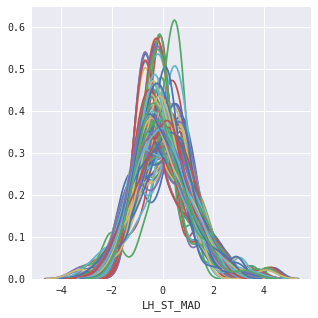

In [6]:
d=d_or
#d = normalize_pd(d, axis=0)
d = scale_pd(d, axis=0)
d = mean_center_pd(d)
#d = maxabs_scale_pd(d, axis=0)

fig, ax = plt.subplots(figsize=(5,5))
for c in d:
    sns.distplot(d[c], hist=False)

In [7]:
d.index.get_level_values(2)

Index(['1.1', '1.2', '1.3', '1.4', '3.2', '3.3', '3.4', '4.1', '4.2', '4.3', '4.4', '5.1', '5.2', '5.3', '5.4', '1.1', '1.2', '1.3', '1.4', '2.1', '2.2', '2.3', '2.4', '3.1', '3.2', '1.1', '1.2', '1.3', '1.4', '2.1', '2.2', '2.3', '2.4', '3.1', '3.2', '3.3', '3.4', '4.1', '4.2', '4.3', '4.4', '5.1', '5.2', '5.3', '5.4'], dtype='object', name='Animal')

In [8]:
[i for i in d.columns]

['mouse length (cm)',
 'Normalized average run speed',
 'RF_Stand_(s)_Mean',
 'RF_StandIndex_Mean',
 'RF_MaxContactAt_(%)_Mean',
 'RF_MaxContactArea_(cm²)_Mean',
 'RF_MaxContactMaxIntensity_Mean',
 'RF_MaxContactMeanIntensity_Mean',
 'RF_PrintLength_(cm)_Mean',
 'RF_PrintWidth_(cm)_Mean',
 'RF_PrintArea_(cm²)_Mean',
 'RF_MaxIntensityAt_(%)_Mean',
 'RF_MaxIntensity_Mean',
 'RF_MinIntensity_Mean',
 'RF_MeanIntensity_Mean',
 'RF_MeanIntensityOfThe15MostIntensePixels_Mean',
 'RF_Swing_(s)_Mean',
 'RF_SwingSpeed_(cm/s)_Mean',
 'RF_StrideLength_(cm)_Mean',
 'RF_StepCycle_(s)_Mean',
 'RF_DutyCycle_(%)_Mean',
 'RF_SingleStance_(s)_Mean',
 'RF_InitialDualStance_(s)_Mean',
 'RF_TerminalDualStance_(s)_Mean',
 'RF_BodySpeed_(cm/s)_Mean',
 'RH_Stand_(s)_Mean',
 'RH_StandIndex_Mean',
 'RH_MaxContactAt_(%)_Mean',
 'RH_MaxContactArea_(cm²)_Mean',
 'RH_MaxContactMaxIntensity_Mean',
 'RH_MaxContactMeanIntensity_Mean',
 'RH_PrintLength_(cm)_Mean',
 'RH_PrintWidth_(cm)_Mean',
 'RH_PrintArea_(cm²)_Mean',
 

In [9]:
#sd, smd, sfull_df = preprocess_vc(sep_runs_data_fp, version = 3, use_vars_fp='data/use_variables.csv')

# Explore parameters

## 1. heatmap of parameters

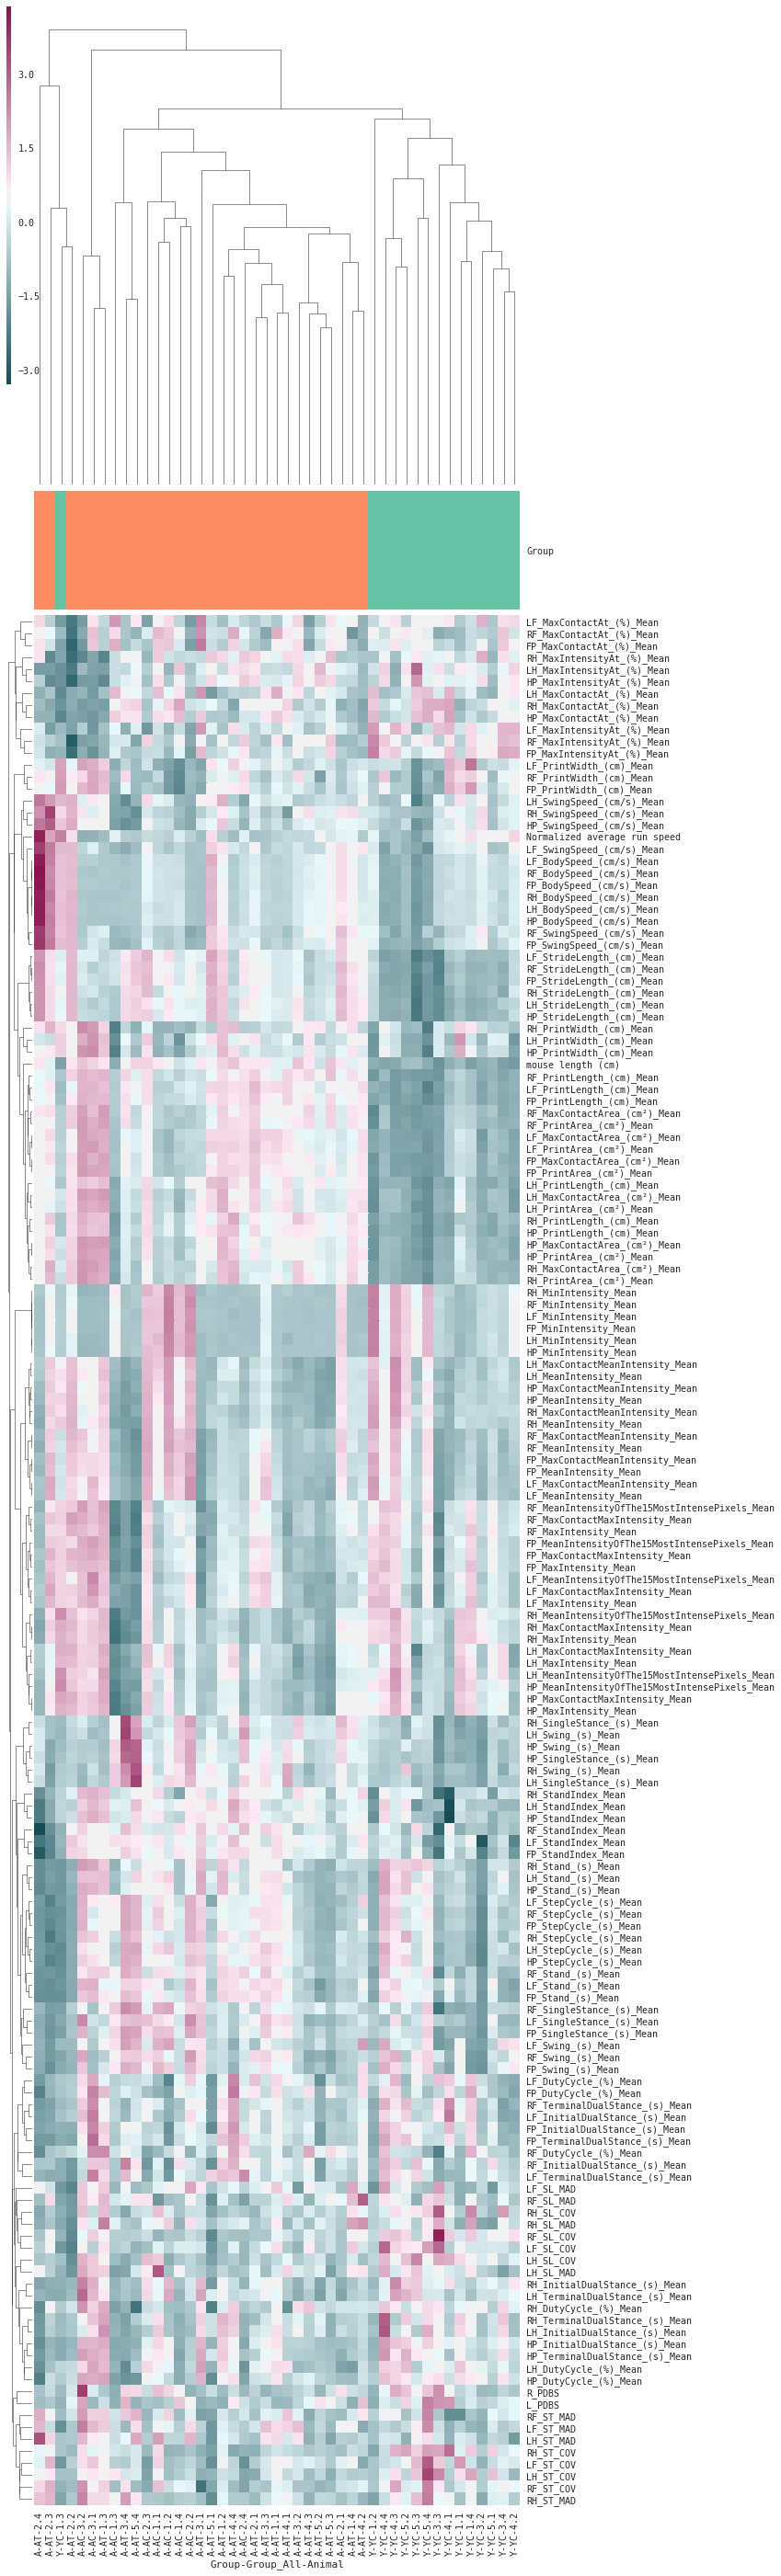

In [10]:
heatmap_with_levels(d.T, use_index_level='Group', figsize=(10,50));

## 2. I'd like to know which variables seem promising.

If you want to delete some variables just list them here:

In [11]:
# Get rid of these vars:
delete_vars = [
"mouse length (cm)",
"FP_PrintLength_(cm)_Mean",
"LF_PrintLength_(cm)_Mean",
"RF_PrintLength_(cm)_Mean",
"LF_StrideLength_(cm)_Mean",
"FP_StrideLength_(cm)_Mean",
"HP_SingleStance_(s)_Mean",
"RF_StrideLength_(cm)_Mean",
"LH_PrintLength_(cm)_Mean",
"HP_PrintLength_(cm)_Mean",
"RH_PrintLength_(cm)_Mean",
"HP_StrideLength_(cm)_Mean",
"LH_StrideLength_(cm)_Mean",
"RF_MaxContactArea_(cm²)_Mean",
"FP_MaxContactArea_(cm²)_Mean",
"RF_PrintArea_(cm²)_Mean",
"FP_PrintArea_(cm²)_Mean",
"LF_MaxContactArea_(cm²)_Mean",
"LF_PrintArea_(cm²)_Mean",
"HP_PrintArea_(cm²)_Mean",
"RH_PrintArea_(cm²)_Mean",
"HP_MaxContactArea_(cm²)_Mean",
"RH_MaxContactArea_(cm²)_Mean",
"LH_PrintArea_(cm²)_Mean",
"LH_MaxContactArea_(cm²)_Mean",
"LF_MaxIntensityAt_(%)_Mean",
"FP_MaxIntensityAt_(%)_Mean",
"RF_MaxContactMeanIntensity_Mean",
"FP_MaxContactMeanIntensity_Mean",
"RF_MeanIntensity_Mean",
"LF_MaxContactMeanIntensity_Mean",
"FP_MeanIntensity_Mean",
"RF_MaxIntensityAt_(%)_Mean",
"LF_MeanIntensity_Mean",
]


In [12]:
selected_a, _ = sel_anova(d, md['Group'], mode = 'classif')
print("Features selected by f_regression")
selected_a = selected_a[[i not in delete_vars for i in selected_a['param']]]
selected_a.ix[selected_a.pval < 0.05]

Features selected by f_regression


param          pval
41                       RH_StrideLength_(cm)_Mean  1.080061e-08
44                        RH_SingleStance_(s)_Mean  1.009408e-04
90                        LH_SingleStance_(s)_Mean  1.274397e-04
147                                      RH_ST_COV  1.591888e-04
131                              HP_Swing_(s)_Mean  1.662838e-04
85                               LH_Swing_(s)_Mean  2.079026e-04
145                                      LH_SL_COV  3.005459e-04
142                                      RF_SL_COV  3.629348e-04
95                              FP_StandIndex_Mean  4.513239e-04
49                              LF_StandIndex_Mean  4.755026e-04
118                             HP_StandIndex_Mean  6.928290e-04
72                              LH_StandIndex_Mean  8.465407e-04
21                        RF_SingleStance_(s)_Mean  1.472454e-03
39                               RH_Swing_(s)_Mean  1.768165e-03
38   RH_MeanIntensityOfThe15MostIntensePixels_Mean  2.754846e-03
113                       FP_SingleStance_(s)_Mean  2.846522e-03
26                              RH_StandIndex_Mean  2.898179e-03
3                               RF_StandIndex_Mean  3.261193e-03
149                                      LH_ST_COV  8.948753e-03
130  HP_MeanIntensityOfThe15MostIntensePixels_Mean  1.014663e-02
144                                      LF_SL_COV  1.358834e-02
143                                      RH_SL_COV  1.469923e-02
2                                RF_Stand_(s)_Mean  1.501540e-02
67                        LF_SingleStance_(s)_Mean  1.967414e-02
35                            RH_MaxIntensity_Mean  1.987885e-02
29                  RH_MaxContactMaxIntensity_Mean  2.265485e-02
88                           LH_StepCycle_(s)_Mean  3.665322e-02
84   LH_MeanIntensityOfThe15MostIntensePixels_Mean  4.358882e-02
94                               FP_Stand_(s)_Mean  4.782083e-02

Heatmap of values of parameters with a p-value < 0.05, clustered according to the numerical value, coloured by mouse group (green: Y, orange: A)


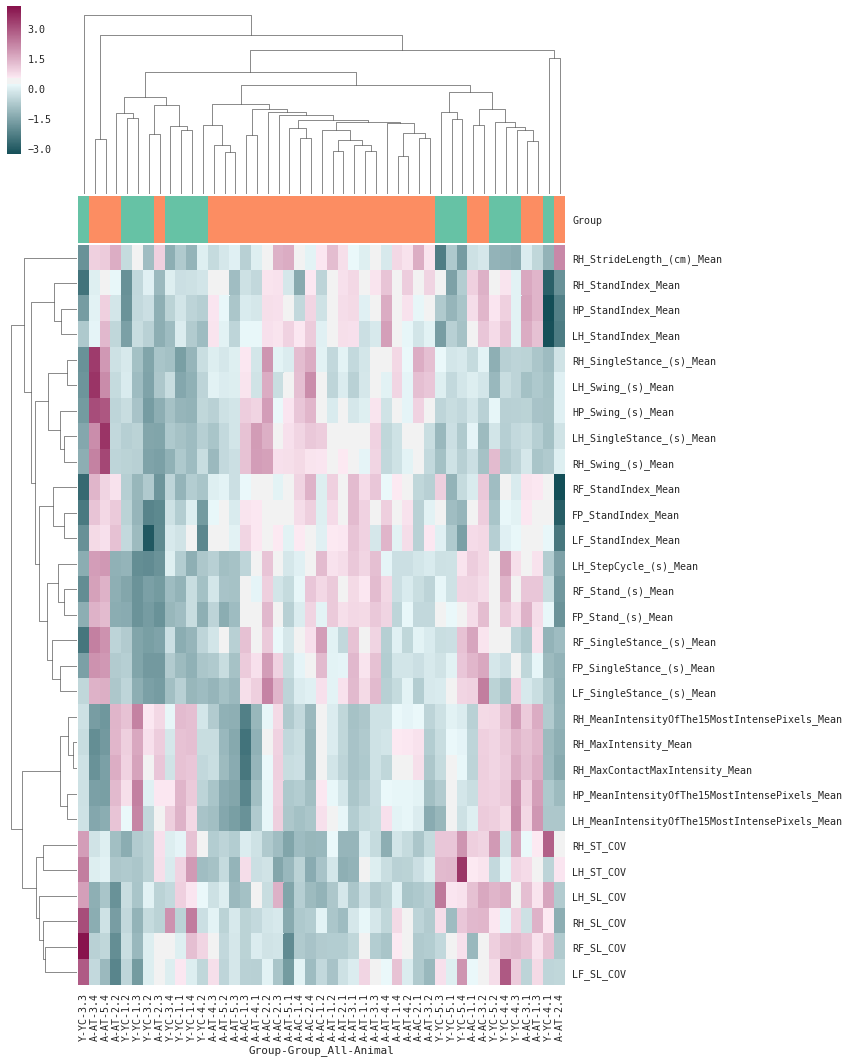

In [13]:
sel = selected_a.param[selected_a.pval < 0.05].tolist()
heatmap_with_levels(d.T.loc[sel], use_index_level='Group', figsize=(10,18));
print("Heatmap of values of parameters with a p-value < 0.05, clustered according to the numerical value, coloured by mouse group (green: Y, orange: A)")

Heatmap of values of parameters with a p-value < 0.05, clustered according to the numerical value, coloured by mouse group (green: YC, orange: AC, blue: AT)


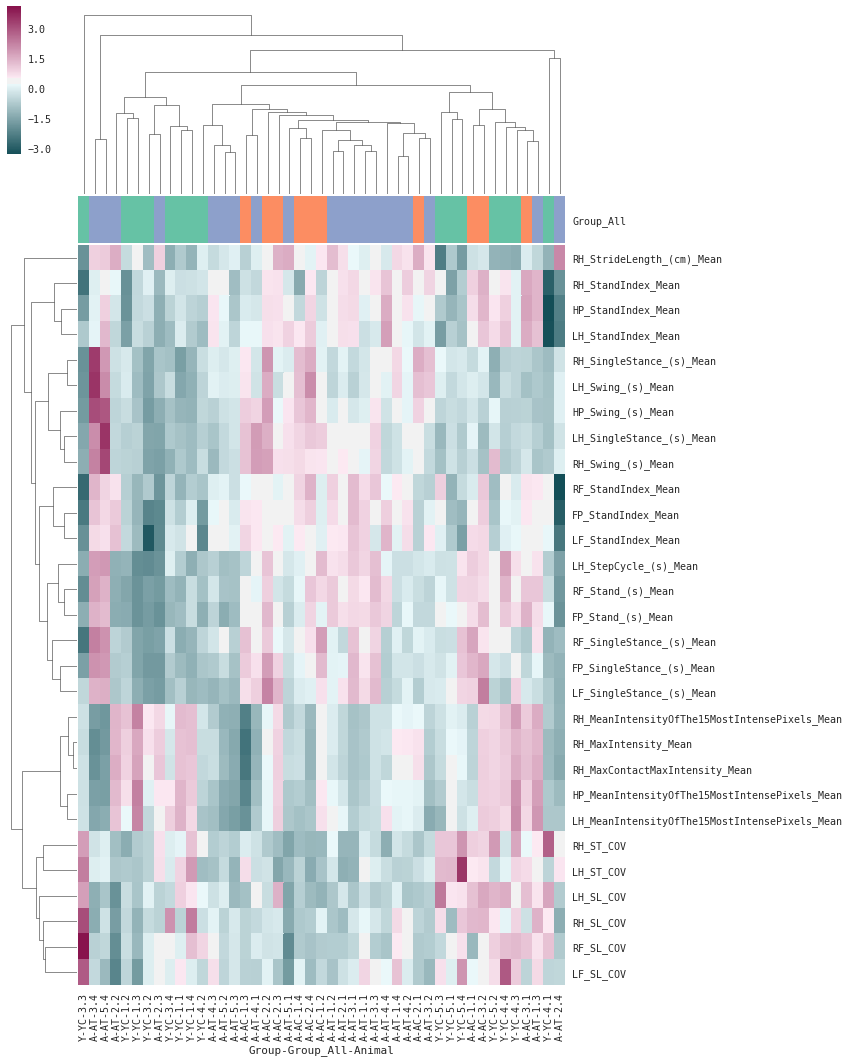

In [14]:
sel = selected_a.param[selected_a.pval < 0.05].tolist()
heatmap_with_levels(d.T.loc[sel], use_index_level='Group_All', figsize=(10,18));
print("Heatmap of values of parameters with a p-value < 0.05, clustered according to the numerical value, coloured by mouse group (green: YC, orange: AC, blue: AT)")

## 3.  Descriptive stats

In [15]:
d.groupby(level="Group").describe().T#.unstack()

Group                                                        A          Y
mouse length (cm)                             count  30.000000  15.000000
                                              mean    0.626670  -1.253339
                                              std     0.543067   0.280682
                                              min    -1.241841  -1.780834
                                              25%     0.267341  -1.464624
                                              50%     0.770401  -1.241841
                                              75%     0.985998  -1.098109
                                              max     1.345327  -0.810646
Normalized average run speed                  count  30.000000  15.000000
                                              mean   -0.072670   0.145340
                                              std     1.023206   1.005810
                                              min    -1.152782  -1.505703
                                              25%    -0.636523  -0.786648
                                              50%    -0.339067   0.301249
                                              75%     0.228669   0.552154
                                              max     4.094137   2.477003
RF_Stand_(s)_Mean                             count  30.000000  15.000000
                                              mean    0.254847  -0.509693
                                              std     0.921349   1.019003
                                              min    -1.739085  -1.961858
                                              25%    -0.304319  -1.320193
                                              50%     0.426297  -0.337827
                                              75%     0.956319   0.244301
                                              max     1.729359   1.407813
RF_StandIndex_Mean                            count  30.000000  15.000000
                                              mean    0.303488  -0.606976
                                              std     0.951578   0.864003
                                              min    -3.284074  -2.702965
                                              25%     0.057722  -1.045487
                                              50%     0.490385  -0.664621
                                              75%     0.867805  -0.206805
                                              max     1.457175   0.989396
RF_MaxContactAt_(%)_Mean                      count  30.000000  15.000000
                                              mean    0.054923  -0.109846
                                              std     1.127942   0.748005
                                              min    -2.447064  -1.242281
                                              25%    -0.933755  -0.745661
                                              50%     0.211670  -0.161763
                                              75%     0.681323   0.510760
                                              max     2.192425   1.298287
RF_MaxContactArea_(cm²)_Mean                  count  30.000000  15.000000
                                              mean    0.540642  -1.081283
                                              std     0.715832   0.523283
                                              min    -0.666645  -2.004360
                                              25%     0.120419  -1.514788
                                              50%     0.655870  -1.158193
                                              75%     1.031151  -0.599262
                                              max     2.033571  -0.368221
RF_MaxContactMaxIntensity_Mean                count  30.000000  15.000000
                                              mean   -0.094868   0.189736
                                              std     1.089164   0.836144
                                              min    -2.266236  -2.042326
                                              25%    -0.743192  -0.163892
    

In [16]:
d.groupby(level="Group_All").describe().T#.unstack()

Group_All                                                   AC         AT         YC
mouse length (cm)                             count  10.000000  20.000000  15.000000
                                              mean    0.511684   0.684162  -1.253339
                                              std     0.747772   0.418137   0.280682
                                              min    -1.241841  -0.091988  -1.780834
                                              25%     0.267341   0.411072  -1.464624
                                              50%     0.770401   0.770401  -1.241841
                                              75%     0.985998   0.842267  -1.098109
                                              max     1.345327   1.345327  -0.810646
Normalized average run speed                  count  10.000000  20.000000  15.000000
                                              mean   -0.298190   0.040090   0.145340
                                              std     0.524219   1.194845   1.005810
                                              min    -1.152782  -0.878796  -1.505703
                                              25%    -0.460381  -0.653073  -0.786648
                                              50%    -0.290285  -0.414440   0.301249
                                              75%     0.167083   0.347627   0.552154
                                              max     0.265511   4.094137   2.477003
RF_Stand_(s)_Mean                             count  10.000000  20.000000  15.000000
                                              mean    0.592087   0.086227  -0.509693
                                              std     0.529709   1.035841   1.019003
                                              min    -0.314882  -1.739085  -1.961858
                                              25%     0.252135  -0.586610  -1.320193
                                              50%     0.801782   0.049710  -0.337827
                                              75%     0.956319   0.906217   0.244301
                                              max     1.137213   1.729359   1.407813
RF_StandIndex_Mean                            count  10.000000  20.000000  15.000000
                                              mean    0.446311   0.232077  -0.606976
                                              std     0.590093   1.095917   0.864003
                                              min    -0.463249  -3.284074  -2.702965
                                              25%     0.032714   0.108163  -1.045487
                                              50%     0.370976   0.496497  -0.664621
                                              75%     0.835514   0.814430  -0.206805
                                              max     1.457175   1.430502   0.989396
RF_MaxContactAt_(%)_Mean                      count  10.000000  20.000000  15.000000
                                              mean    0.397850  -0.116540  -0.109846
                                              std     0.967826   1.185464   0.748005
                                              min    -1.291164  -2.447064  -1.242281
                                              25%     0.154268  -1.025012  -0.745661
                                              50%     0.452718  -0.114881  -0.161763
                                              75%     1.181863   0.454436   0.510760
                                              max     1.492437   2.192425   1.298287
RF_MaxContactArea_(cm²)_Mean                  count  10.000000  20.000000  15.000000
                                              mean    0.215869   0.703028  -1.081283
                                              std     0.936899   0.532020   0.523283
                                              min    -0.666645  -0.335334  -2.004360
                                              25%    -0.553135   0.460541  -1.514788
                                              50%    -0.132251   0.741104  -1.158193
     

## 4. Plot the aggregate parameters

Plot coefficients of variation:

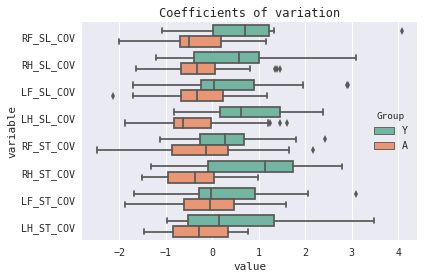

In [17]:
#sns.boxplot(d.ix[:,d.columns.str.contains('COV')]);
d_ = d.ix[:,d.columns.str.contains('COV')]
d_ = pd.melt(d_.reset_index(), id_vars=d_.index.names)
sns.boxplot(y='variable', x= 'value', data=d_, hue='Group', palette=color_map);
plt.title('Coefficients of variation');

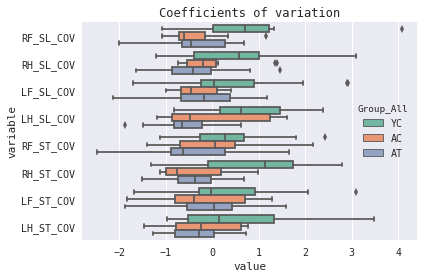

In [18]:
#sns.boxplot(d.ix[:,d.columns.str.contains('COV')]);
d_ = d.ix[:,d.columns.str.contains('COV')]
d_ = pd.melt(d_.reset_index(), id_vars=d_.index.names)
sns.boxplot(y='variable', x= 'value', data=d_, hue='Group_All', palette=color_mapYAT);
plt.title('Coefficients of variation');

Collapse left and right parameters:

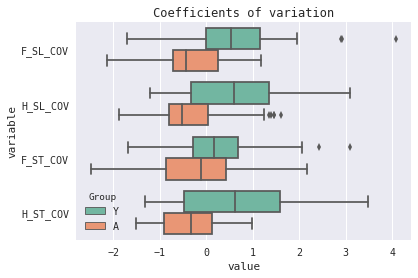

In [19]:
#be agnostic to L R
d_.variable = [i[1:] for i in d_.variable]
sns.boxplot(y='variable', x= 'value', data=d_, hue='Group', palette=color_map);
plt.title('Coefficients of variation');

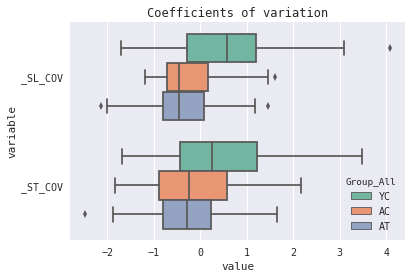

In [20]:
#be agnostic to L R
d_.variable = [i[1:] for i in d_.variable]
sns.boxplot(y='variable', x= 'value', data=d_, hue='Group_All', palette=color_mapYAT);
plt.title('Coefficients of variation');

Just as another way to visualize this:

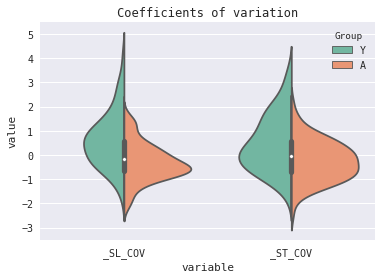

In [21]:
sns.violinplot(y="value", x="variable", hue="Group", data=d_,
               split=True, palette=color_map);
plt.title('Coefficients of variation');

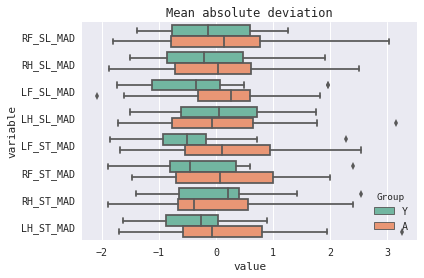

In [22]:
#sns.boxplot(d.ix[:,d.columns.str.contains('COV')]);
d_ = d.ix[:,d.columns.str.contains('MAD')]
d_ = pd.melt(d_.reset_index(), id_vars=d_.index.names)
sns.boxplot(y='variable', x= 'value', data=d_, hue='Group', palette=color_map);
plt.title('Mean absolute deviation');

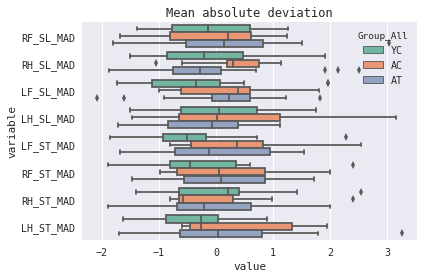

In [23]:
#sns.boxplot(d.ix[:,d.columns.str.contains('COV')]);
d_ = d.ix[:,d.columns.str.contains('MAD')]
d_ = pd.melt(d_.reset_index(), id_vars=d_.index.names)
sns.boxplot(y='variable', x= 'value', data=d_, hue='Group_All', palette=color_mapYAT);
plt.title('Mean absolute deviation');

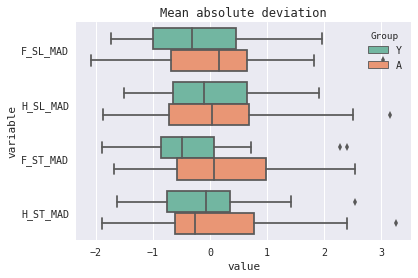

In [24]:
#be agnostic to L R
d_ = d.ix[:,d.columns.str.contains('MAD')]
d_ = pd.melt(d_.reset_index(), id_vars=d_.index.names)

d_.variable = [i[1:] for i in d_.variable]
sns.boxplot(y='variable', x= 'value', data=d_, hue='Group', palette=color_map);
plt.title('Mean absolute deviation');

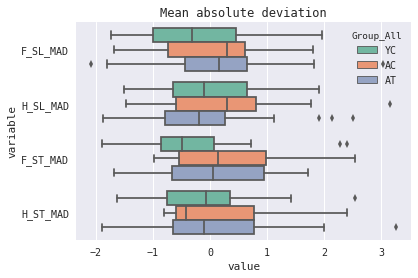

In [25]:
#be agnostic to L R
d_ = d.ix[:,d.columns.str.contains('MAD')]
d_ = pd.melt(d_.reset_index(), id_vars=d_.index.names)
d_.variable = [i[1:] for i in d_.variable]
sns.boxplot(y='variable', x= 'value', data=d_, hue='Group_All', palette=color_mapYAT);
plt.title('Mean absolute deviation');

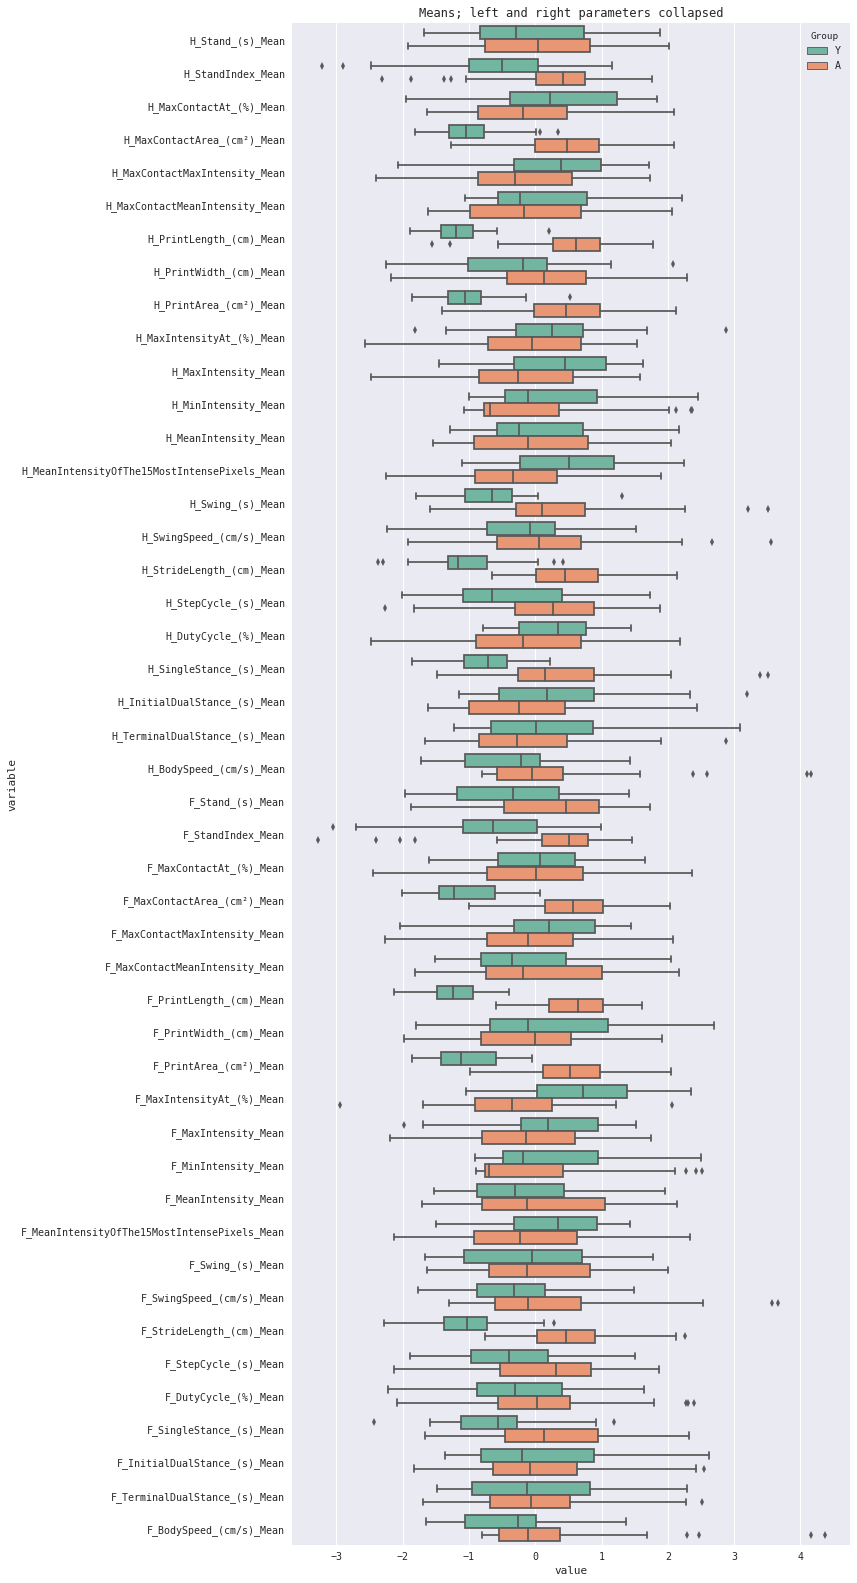

In [26]:
#sns.boxplot(d.ix[:,d.columns.str.contains('COV')]);
d_ = only_LR(d).ix[:,only_LR(d).columns.str.contains('Mean')]
d_ = pd.melt(d_.reset_index(), id_vars=d_.index.names)
d_.variable = [i[1:] for i in d_.variable]
plt.figure(figsize=(10, 28))
sns.boxplot(y='variable', x= 'value', data=d_, hue='Group', palette=color_map);
plt.title('Means; left and right parameters collapsed');

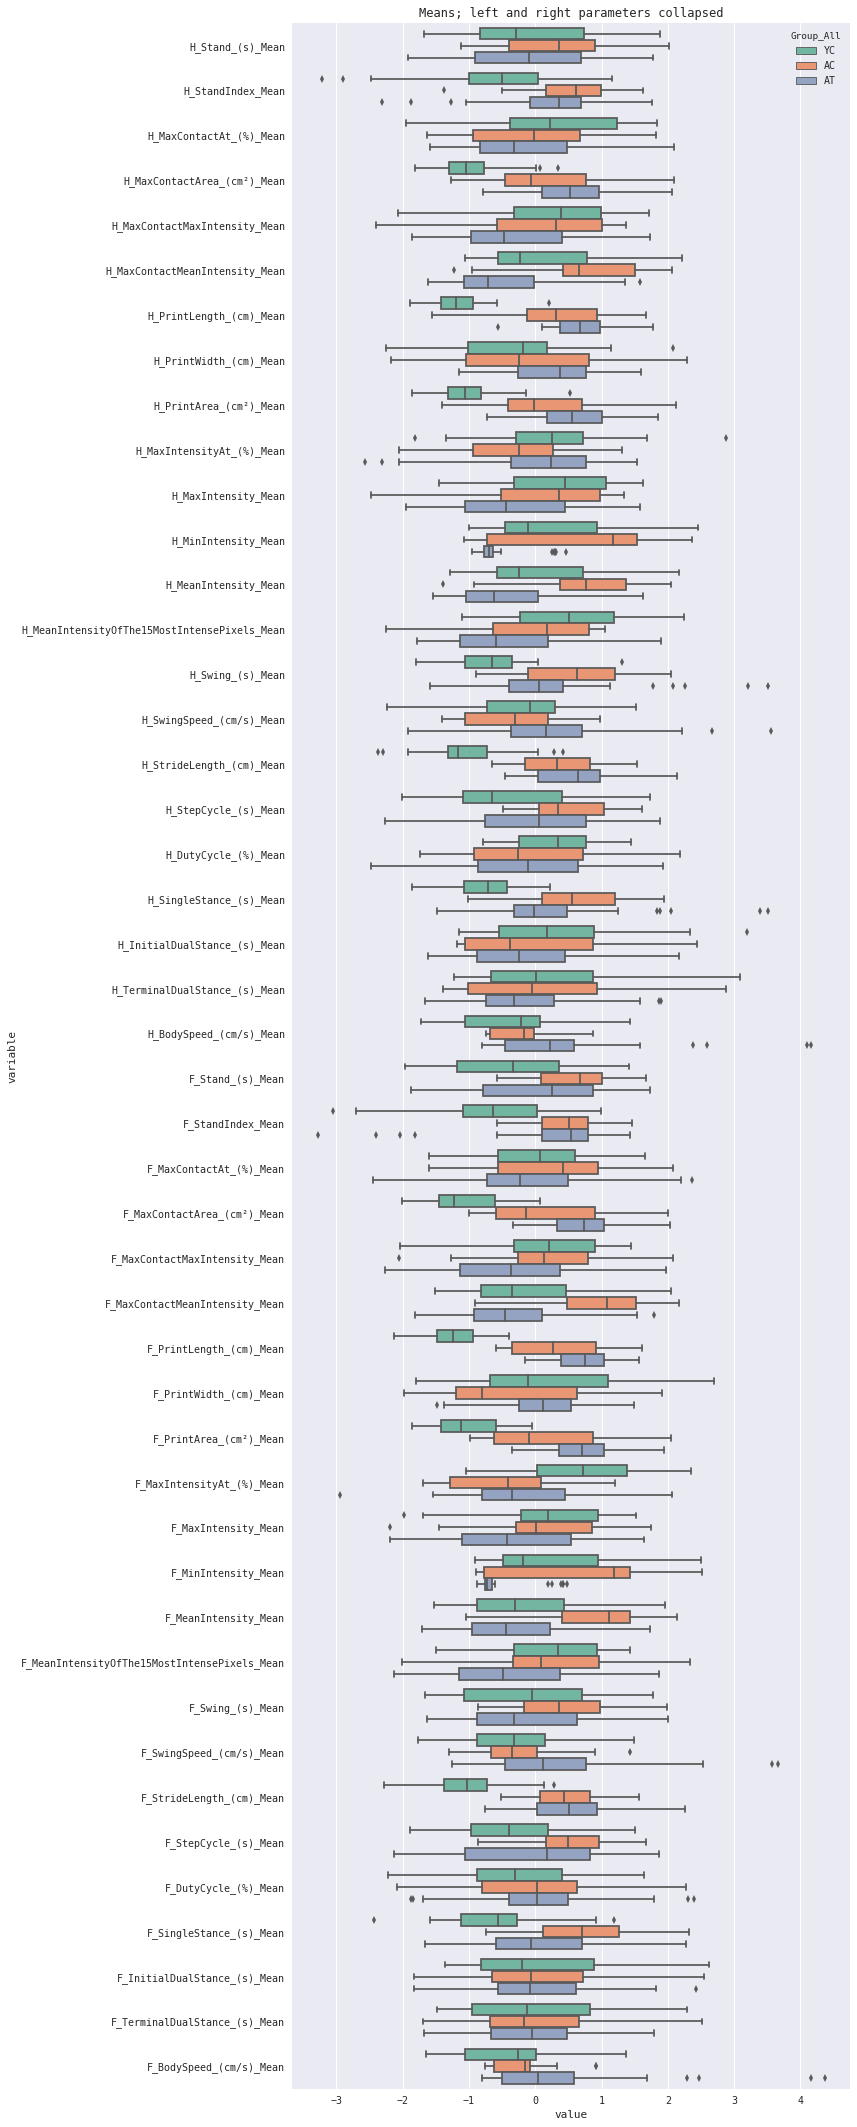

In [27]:
#sns.boxplot(d.ix[:,d.columns.str.contains('COV')]);
d_ = only_LR(d).ix[:,only_LR(d).columns.str.contains('Mean')]
d_ = pd.melt(d_.reset_index(), id_vars=d_.index.names)
d_.variable = [i[1:] for i in d_.variable]
plt.figure(figsize=(10, 38))
sns.boxplot(y='variable', x= 'value', data=d_, hue='Group_All', palette=color_mapYAT);
plt.title('Means; left and right parameters collapsed');

# Left side - right side relationships - 'laterality'
Values in the table are correlations between each left-side gait parameter and the corresponding right-seid gait parameter. Lowest correlations are sorted first.

Measures:

- correlation
- covariance
- mean_absolute_difference - mean of absolute differences between the right and left side parameter for each mouse ( mean(abs(L-R)) )
- mse - mean squared error (from the regression line)

### 1. First, let's compare Y and A

In [28]:
madiff = dist_L_R(d, metric='mean_absolute_difference', use_level=0)
covs = dist_L_R(d, metric='covariance', use_level=0)
corrs = dist_L_R(d, metric='correlation', use_level=0)
mse = dist_L_R(d, metric='mse', use_level=0)

In [29]:
#corrs.groupby(corrs.index.get_level_values(0)).apply(lambda x: x.sort_values('correlation', ascending=True))
#corrs.sort_values('correlation', ascending=True).head(10)

In [30]:
distances = pd.merge(corrs, madiff)
distances = pd.merge(distances, covs)
distances = pd.merge(distances, mse)

In [31]:
print("Various co-measures between the left and right side parameter")
distances.sort_values('correlation', ascending=True)

Various co-measures between the left and right side parameter


group                                     parameter  correlation  mean_absolute_difference  covariance       mse
83      Y                  H_InitialDualStance_(s)_Mean    -0.039210                  1.194399   -0.040442  2.062019
106     Y                              H_Swing_(s)_Mean     0.147617                  0.532609    0.055068  0.608287
56      Y                  F_InitialDualStance_(s)_Mean     0.150308                  1.079551    0.160981  1.755471
55      Y                          F_DutyCycle_(%)_Mean     0.180950                  0.966008    0.170391  1.578886
107     Y                 H_TerminalDualStance_(s)_Mean     0.204711                  0.986410    0.206941  1.575716
58      Y                       F_MaxContactAt_(%)_Mean     0.230311                  0.765082    0.142545  1.000706
7       A                     F_MaxIntensityAt_(%)_Mean     0.286897                  0.886795    0.231357  1.121986
16      A                                      F_SL_MAD     0.292829                  0.994045    0.289769  1.398226
80      Y                 F_TerminalDualStance_(s)_Mean     0.305942                  0.874921    0.312659  1.472750
96      Y                                      H_SL_COV     0.350248                  1.052523    0.391329  1.511615
97      Y                                      H_SL_MAD     0.361410                  0.872624    0.345152  1.172279
82      Y                          H_DutyCycle_(%)_Mean     0.380125                  0.557762    0.156439  0.488858
43      A                                      H_SL_MAD     0.397603                  0.927257    0.429324  1.265576
100     Y                       H_SingleStance_(s)_Mean     0.429209                  0.411975    0.099463  0.309448
1       A                          F_DutyCycle_(%)_Mean     0.439237                  0.869680    0.464661  1.183732
29      A                  H_InitialDualStance_(s)_Mean     0.456513                  0.800851    0.441653  1.030421
26      A                 F_TerminalDualStance_(s)_Mean     0.457347                  0.753969    0.463669  1.102569
2       A                  F_InitialDualStance_(s)_Mean     0.462099                  0.762838    0.469302  1.071425
28      A                          H_DutyCycle_(%)_Mean     0.470965                  0.951408    0.593120  1.288900
53      A                 H_TerminalDualStance_(s)_Mean     0.490496                  0.790397    0.492883  1.013042
74      Y                             F_StandIndex_Mean     0.494461                  0.730029    0.437340  0.868379
98      Y                                      H_ST_COV     0.497619                  0.843998    0.766163  1.509388
61      Y                     F_MaxIntensityAt_(%)_Mean     0.500985                  0.671505    0.414900  0.786348
73      Y                       F_SingleStance_(s)_Mean     0.507087                  0.628019    0.343581  0.673120
31      A                       H_MaxContactAt_(%)_Mean     0.569458                  0.750267    0.536477  0.803041
88      Y                     H_MaxIntensityAt_(%)_Mean     0.600064                  0.717177    0.527613  0.776473
46      A                       H_SingleStance_(s)_Mean     0.622129                  0.691472    0.598873  0.707887
45      A                                      H_ST_MAD     0.631872                  0.647789    0.695759  0.841569
4       A                       F_MaxContactAt_(%)_Mean     0.636898                  0.709719    0.782120  0.889944
18      A                                      F_ST_MAD     0.639178                  0.626432    0.615164  0.675222
99      Y                                      H_ST_MAD     0.640842                  0.797001    0.468923  0.818562
70      Y                                      F_SL_MAD     0.641850                  0.695348    0.633582  0.793269
52      A                              H_Swing_(s)_Mean     0.643997                  0.678556    0.641448  0.689389
25      A                 

###### Group by parameter name for easier comparison:

In [32]:
distances.groupby('parameter').apply(lambda x: x.sort_values('correlation', ascending=True)).drop('parameter',1)

group  correlation  mean_absolute_difference  covariance       mse
parameter                                                                                                          
F_BodySpeed_(cm/s)_Mean                      54      Y     0.993493                  0.070864    0.575704  0.007523
                                             0       A     0.996467                  0.069113    1.164489  0.008075
F_DutyCycle_(%)_Mean                         55      Y     0.180950                  0.966008    0.170391  1.578886
                                             1       A     0.439237                  0.869680    0.464661  1.183732
F_InitialDualStance_(s)_Mean                 56      Y     0.150308                  1.079551    0.160981  1.755471
                                             2       A     0.462099                  0.762838    0.469302  1.071425
F_MaxContactArea_(cm²)_Mean                  57      Y     0.818157                  0.241449    0.235338  0.099342
                                             3       A     0.843637                  0.330921    0.448825  0.161816
F_MaxContactAt_(%)_Mean                      58      Y     0.230311                  0.765082    0.142545  1.000706
                                             4       A     0.636898                  0.709719    0.782120  0.889944
F_MaxContactMaxIntensity_Mean                5       A     0.888920                  0.417040    1.013341  0.248593
                                             59      Y     0.900033                  0.335486    0.725409  0.173761
F_MaxContactMeanIntensity_Mean               6       A     0.915467                  0.358116    1.024308  0.183470
                                             60      Y     0.953354                  0.249235    0.817913  0.076851
F_MaxIntensityAt_(%)_Mean                    7       A     0.286897                  0.886795    0.231357  1.121986
                                             61      Y     0.500985                  0.671505    0.414900  0.786348
F_MaxIntensity_Mean                          8       A     0.868403                  0.453992    0.942484  0.282004
                                             62      Y     0.910316                  0.347875    0.789956  0.180679
F_MeanIntensityOfThe15MostIntensePixels_Mean 9       A     0.852771                  0.513707    1.011200  0.339962
                                             63      Y     0.864976                  0.364827    0.566045  0.178235
F_MeanIntensity_Mean                         10      A     0.922840                  0.356271    1.033575  0.167419
                                             64      Y     0.946123                  0.257404    0.815462  0.088020
F_MinIntensity_Mean                          11      A     0.996904                  0.059175    0.998701  0.006020
                                             65      Y     0.997308                  0.059742    1.034024  0.005279
F_PrintArea_(cm²)_Mean                       66      Y     0.851762                  0.222009    0.220206  0.072955
                                             12      A     0.863200                  0.314687    0.492779  0.152157
F_PrintLength_(cm)_Mean                      13      A     0.764679                  0.315855    0.262302  0.156164
                                             67      Y     0.777695                  0.209424    0.126902  0.068879
F_PrintWidth_(cm)_Mean                       14      A     0.724384                  0.524900    0.616252  0.455592
                                             68      Y     0.790064                  0.587164    1.125131  0.563839
F_SL_COV                                     15      A     0.666236                  0.440341    0.349281  0.350995
                                             69      Y     0.675895                  0.810447    1.007419  0.952425
F_SL_MAD                                     16      A     0.292829                  0.994045    0.289769

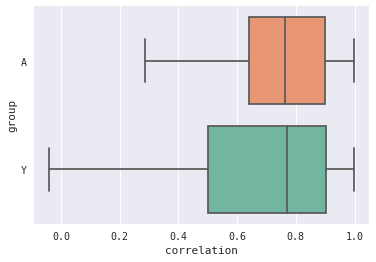

In [33]:
corrs_ = corrs.reset_index()#.rename(columns={0:'corr'})
sns.boxplot(data=corrs_, x='correlation', y='group', palette = color_map)#, hue='Group_All')

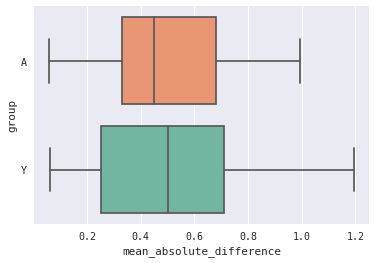

In [34]:
madiff_ = madiff.reset_index()#.rename(columns={0:'corr'})
sns.boxplot(data=madiff_, x='mean_absolute_difference', y='group', palette = color_map)#, hue='Group_All')

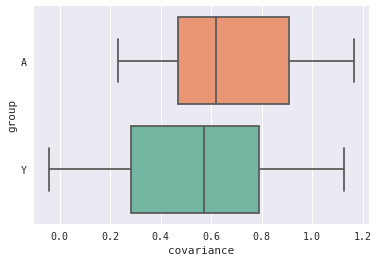

In [35]:
covs_ = covs.reset_index()#.rename(columns={0:'corr'})
sns.boxplot(data=covs_, x='covariance', y='group', palette = color_map)#, hue='Group_All')

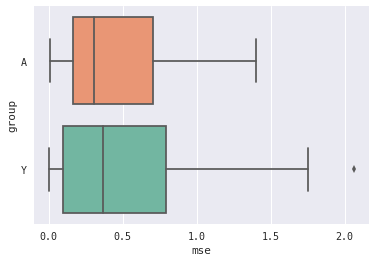

In [36]:
mse_ = mse.reset_index()#.rename(columns={0:'corr'})
sns.boxplot(data=mse_, x='mse', y='group', palette=color_map)#, hue='Group_All')

### 2. Now, let's compare YC with AC and AT

In [37]:
madiff = dist_L_R(full_df, metric='mean_absolute_difference', use_level=1)
covs = dist_L_R(full_df, metric='covariance', use_level=1)
corrs = dist_L_R(d, metric='correlation', use_level=1)
mse = dist_L_R(d, metric='mse', use_level=1)

In [38]:
distances = pd.merge(corrs, madiff)
distances = pd.merge(distances, covs)
distances = pd.merge(distances, mse)

In [39]:
print("Various co-measures between the left and right side parameter")
distances.sort_values('correlation', ascending=True)

Various co-measures between the left and right side parameter


group                                     parameter  correlation  mean_absolute_difference  covariance       mse
137    YC                  H_InitialDualStance_(s)_Mean    -0.039210                  0.032621   -0.000031  2.062019
15     AC                                      F_SL_COV     0.066838                  0.018882    0.000028  0.575859
160    YC                              H_Swing_(s)_Mean     0.147617                  0.014367    0.000042  0.608287
110    YC                  F_InitialDualStance_(s)_Mean     0.150308                  0.014356    0.000027  1.755471
43     AC                                      H_SL_MAD     0.151218                  0.248237    0.005012  1.953660
16     AC                                      F_SL_MAD     0.166582                  0.147491    0.002705  1.512153
109    YC                          F_DutyCycle_(%)_Mean     0.180950                  2.658571    1.277986  1.578886
95     AT                        H_PrintWidth_(cm)_Mean     0.182445                  0.068937    0.000863  0.750315
161    YC                 H_TerminalDualStance_(s)_Mean     0.204711                  0.027306    0.000163  1.575716
112    YC                       F_MaxContactAt_(%)_Mean     0.230311                  4.134189    4.275467  1.000706
7      AC                     F_MaxIntensityAt_(%)_Mean     0.245939                  4.912107    6.968007  1.217154
134    YC                 F_TerminalDualStance_(s)_Mean     0.305942                  0.012400    0.000058  1.472750
61     AT                     F_MaxIntensityAt_(%)_Mean     0.317276                  5.548174    9.289606  1.074402
94     AT                       H_PrintLength_(cm)_Mean     0.333139                  0.080656    0.002621  0.290590
150    YC                                      H_SL_COV     0.350248                  0.057314    0.001167  1.511615
2      AC                  F_InitialDualStance_(s)_Mean     0.351501                  0.014306    0.000069  1.504303
70     AT                                      F_SL_MAD     0.355658                  0.124860    0.006595  1.341262
151    YC                                      H_SL_MAD     0.361410                  0.157656    0.012032  1.172279
19     AC                       F_SingleStance_(s)_Mean     0.374149                  0.020629    0.000171  0.902203
136    YC                          H_DutyCycle_(%)_Mean     0.380125                  2.879072    4.015505  0.488858
1      AC                          F_DutyCycle_(%)_Mean     0.381879                  2.420357    3.512865  1.369725
82     AT                          H_DutyCycle_(%)_Mean     0.391180                  5.133437   12.938001  1.501035
45     AC                                      H_ST_MAD     0.411018                  0.006681    0.000036  1.285003
67     AT                       F_PrintLength_(cm)_Mean     0.412195                  0.055549    0.001489  0.207121
68     AT                        F_PrintWidth_(cm)_Mean     0.416789                  0.035644    0.000656  0.542359
154    YC                       H_SingleStance_(s)_Mean     0.429209                  0.010525    0.000066  0.309448
26     AC                 F_TerminalDualStance_(s)_Mean     0.442812                  0.012216    0.000116  1.517717
93     AT                        H_PrintArea_(cm²)_Mean     0.452362                  0.082962    0.004903  0.383653
49     AC                          H_StepCycle_(s)_Mean     0.457580                  0.026962    0.000485  0.376848
55     AT                          F_DutyCycle_(%)_Mean     0.475796                  2.312284    3.674596  1.090736
80     AT                 F_TerminalDualStance_(s)_Mean     0.481561                  0.009437    0.000076  0.894995
128    YC                             F_StandIndex_Mean     0.494461                  0.621646    0.346384  0.868379
29     AC                  H_InitialDualStance_(s)_Mean     0.495762                  0.030282    0.000414  1.615495
152    YC                 

###### Group by parameter name for easier comparison:

In [40]:
distances.groupby('parameter').apply(lambda x: x.sort_values('correlation', ascending=True)).drop('parameter',1)

group  correlation  mean_absolute_difference  covariance       mse
parameter                                                                                                          
F_BodySpeed_(cm/s)_Mean                      0      AC     0.987163                  0.219830    3.633488  0.006985
                                             108    YC     0.993493                  0.266567    8.205597  0.007523
                                             54     AT     0.997089                  0.278616   22.103913  0.008620
F_DutyCycle_(%)_Mean                         109    YC     0.180950                  2.658571    1.277986  1.578886
                                             1      AC     0.381879                  2.420357    3.512865  1.369725
                                             55     AT     0.475796                  2.312284    3.674596  1.090736
F_InitialDualStance_(s)_Mean                 110    YC     0.150308                  0.014356    0.000027  1.755471
                                             2      AC     0.351501                  0.014306    0.000069  1.504303
                                             56     AT     0.590656                  0.007450    0.000090  0.854986
F_MaxContactArea_(cm²)_Mean                  57     AT     0.565068                  0.043967    0.001759  0.212328
                                             111    YC     0.818157                  0.026758    0.002900  0.099342
                                             3      AC     0.974780                  0.027929    0.012014  0.060791
F_MaxContactAt_(%)_Mean                      112    YC     0.230311                  4.134189    4.275467  1.000706
                                             58     AT     0.576356                  4.303298   21.323529  1.013091
                                             4      AC     0.827517                  5.002895   29.708028  0.643651
F_MaxContactMaxIntensity_Mean                59     AT     0.878417                  7.276658  267.552207  0.270924
                                             5      AC     0.895799                  5.671222  244.318510  0.203930
                                             113    YC     0.900033                  5.465723  190.174425  0.173761
F_MaxContactMeanIntensity_Mean               6      AC     0.860515                  2.872320   53.703411  0.224505
                                             60     AT     0.899182                  3.017859   52.912685  0.162953
                                             114    YC     0.953354                  2.001130   58.195825  0.076851
F_MaxIntensityAt_(%)_Mean                    7      AC     0.245939                  4.912107    6.968007  1.217154
                                             61     AT     0.317276                  5.548174    9.289606  1.074402
                                             115    YC     0.500985                  4.091237   14.823864  0.786348
F_MaxIntensity_Mean                          62     AT     0.848967                  8.385320  267.377660  0.320435
                                             8      AC     0.897771                  6.438742  274.548076  0.205142
                                             116    YC     0.910316                  5.981299  227.850174  0.180679
F_MeanIntensityOfThe15MostIntensePixels_Mean 63     AT     0.831052                  7.905425  196.197228  0.359732
                                             117    YC     0.864976                  5.142528  122.699946  0.178235
                                             9      AC     0.875415                  6.684400  251.508123  0.300422
F_MeanIntensity_Mean                         10     AC     0.884244                  3.009220   54.954231  0.196105
                                             64     AT     0.907625                  2.841160   52.414213  0.153076
                                             118    YC     0.946123                  2.043737   56.334689

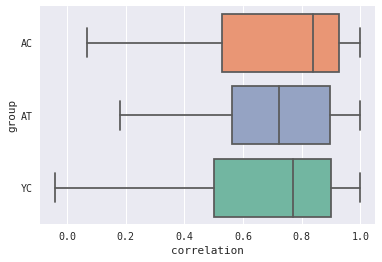

In [41]:
corrs_ = corrs.reset_index()#.rename(columns={0:'corr'})
sns.boxplot(data=corrs_, x='correlation', y='group', palette = color_mapYAT)#, hue='Group_All')

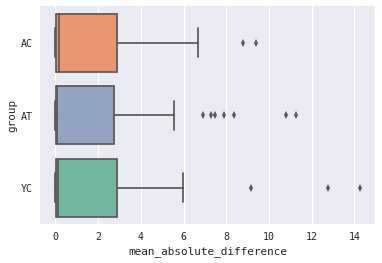

In [42]:
madiff_ = madiff.reset_index()#.rename(columns={0:'corr'})
sns.boxplot(data=madiff_, x='mean_absolute_difference', y='group', palette = color_mapYAT)#, hue='Group_All')

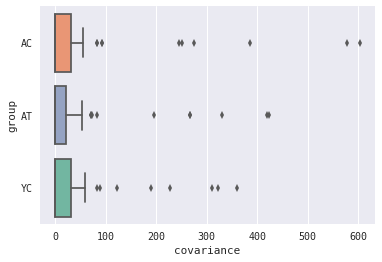

In [43]:
covs_ = covs.reset_index()#.rename(columns={0:'corr'})
sns.boxplot(data=covs_, x='covariance', y='group', palette = color_mapYAT)#, hue='Group_All')

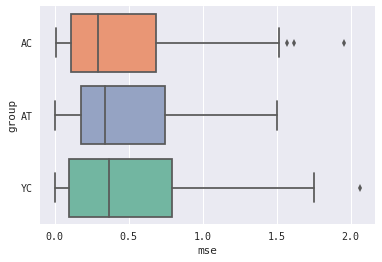

In [44]:
mse_ = mse.reset_index()#.rename(columns={0:'corr'})
sns.boxplot(data=mse_, x='mse', y='group', palette = color_mapYAT)#, hue='Group_All')

### Visualize with heatmaps

How correlated are sided parameters?

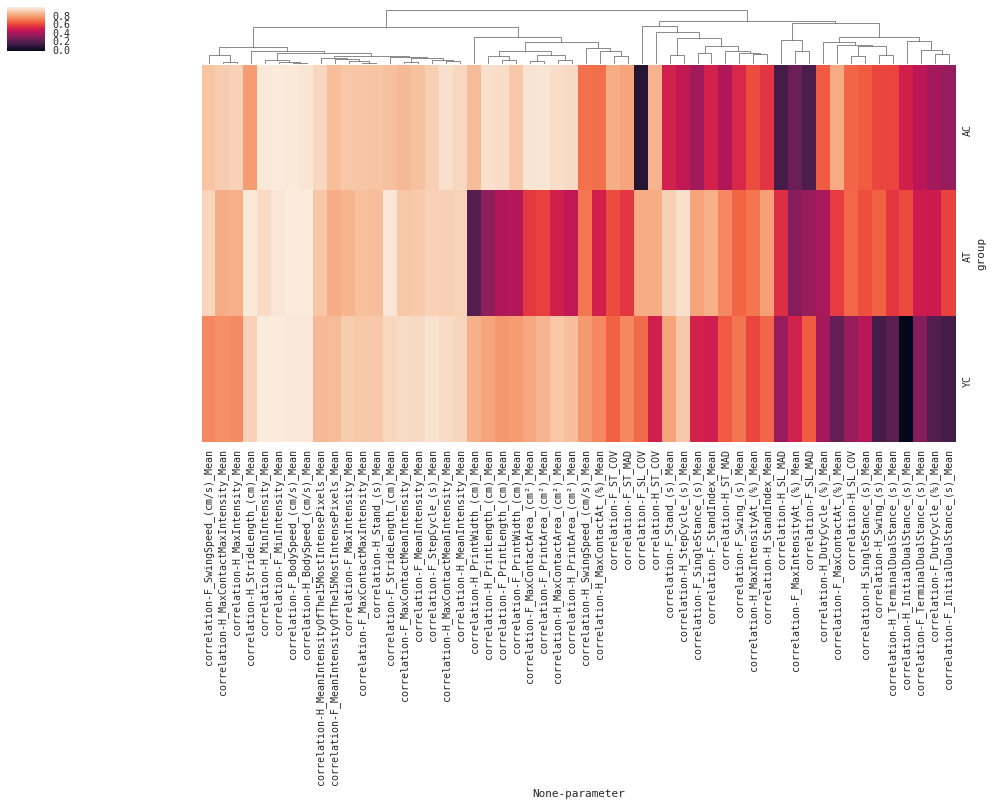

In [45]:
#plt.figure( figsize=(5,17))
sns.clustermap(corrs.pivot_table(columns='parameter', index='group'), row_cluster=False, figsize=(17,8));

What about the mean absolute difference?

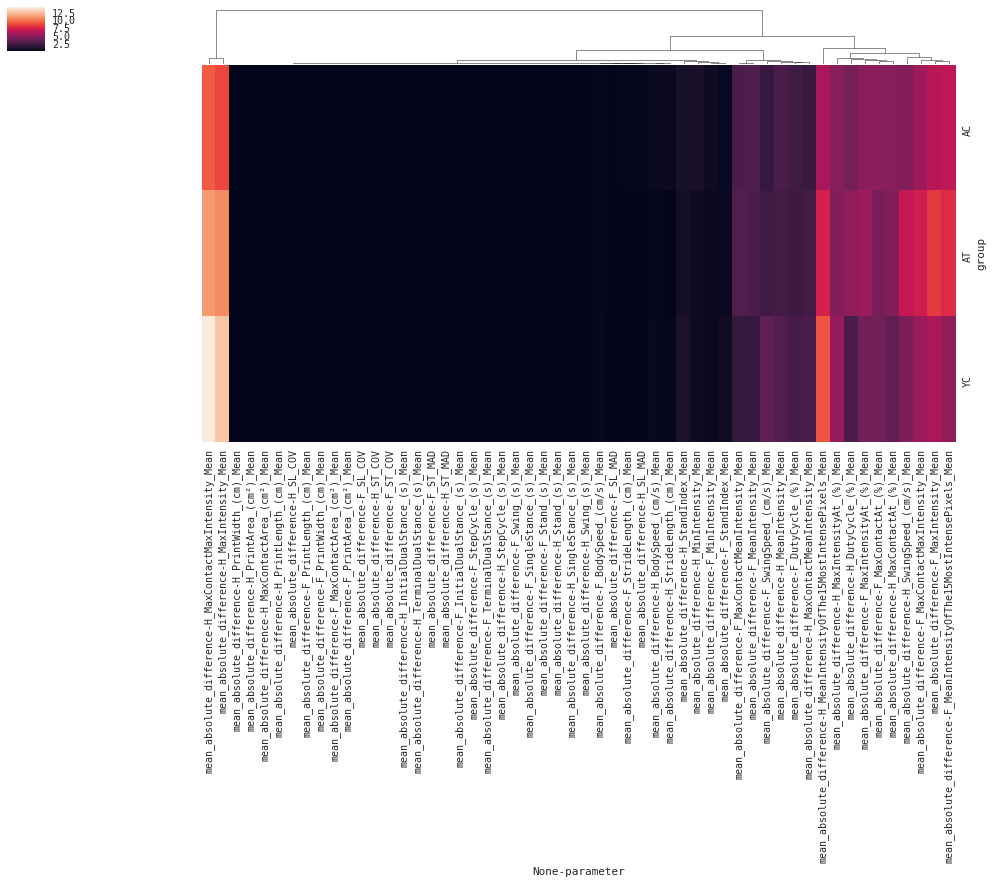

In [46]:
sns.clustermap(
    madiff.pivot_table(columns='parameter', index='group'),
    row_cluster=False, figsize=(17,8));

Covariance

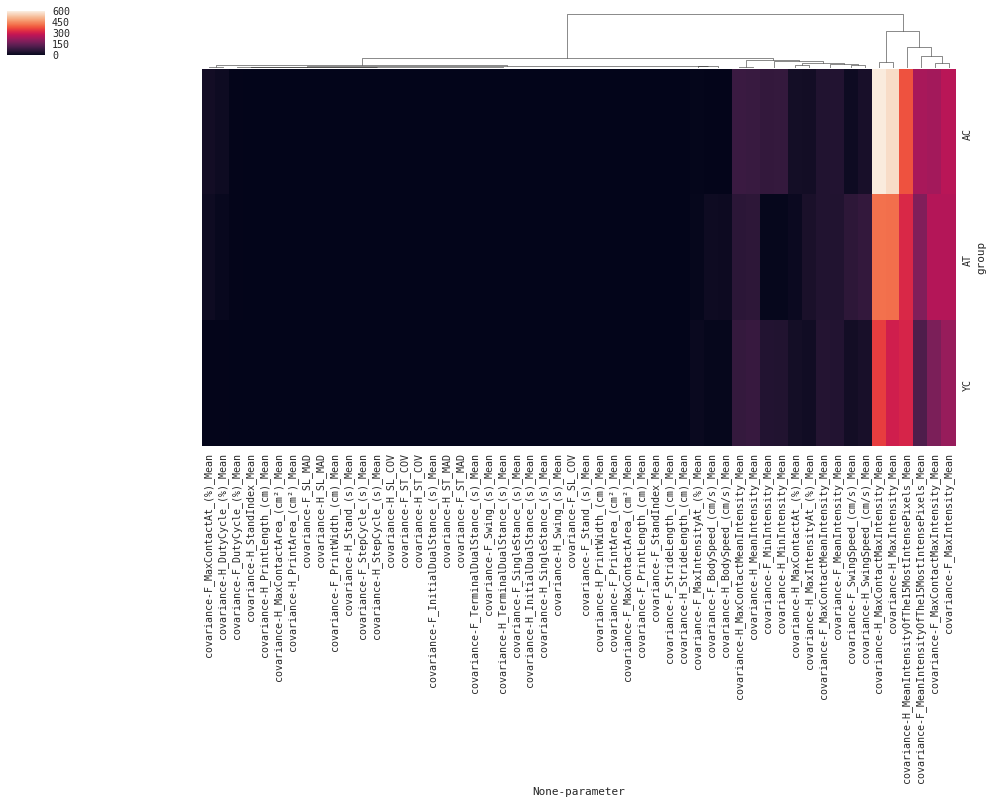

In [47]:
sns.clustermap(
    covs.pivot_table(columns='parameter', index='group'),
    row_cluster=False, figsize=(17,8));

Mean squared error

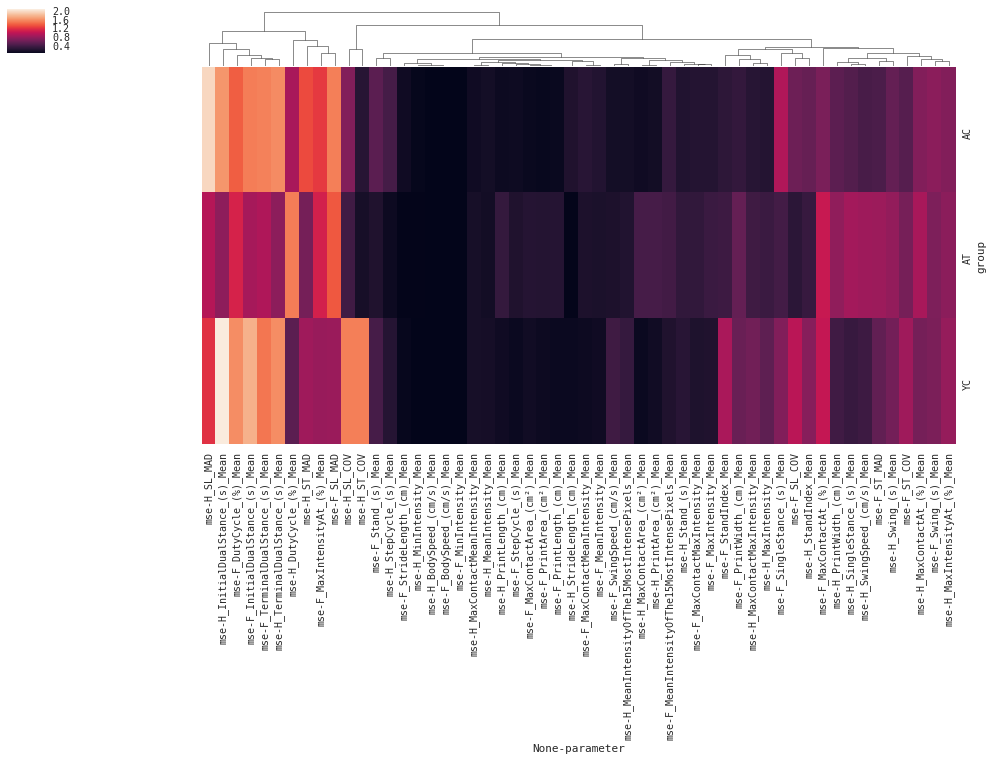

In [48]:
sns.clustermap(
    mse.pivot_table(columns='parameter', index='group'),
    row_cluster=False, figsize=(17,8));

# gait index

### 1. I'd like to know which variables seem promising: which are different between groups with p-value < 0.05?

In [49]:
selectedYA, _ = sel_anova(d, md['Group'], mode = 'classif')

print("Features selected by f_regression")
significantYA = selectedYA.ix[selectedYA.pval < 0.05]
significantYA

Features selected by f_regression


param          pval
0                                mouse length (cm)  5.771471e-16
100                       FP_PrintLength_(cm)_Mean  1.274370e-14
54                        LF_PrintLength_(cm)_Mean  5.442695e-14
8                         RF_PrintLength_(cm)_Mean  1.743071e-13
123                       HP_PrintLength_(cm)_Mean  1.799055e-12
77                        LH_PrintLength_(cm)_Mean  2.718884e-12
31                        RH_PrintLength_(cm)_Mean  5.487773e-11
97                    FP_MaxContactArea_(cm²)_Mean  8.070878e-10
5                     RF_MaxContactArea_(cm²)_Mean  9.771617e-10
102                        FP_PrintArea_(cm²)_Mean  2.148454e-09
10                         RF_PrintArea_(cm²)_Mean  2.193083e-09
87                       LH_StrideLength_(cm)_Mean  3.673875e-09
133                      HP_StrideLength_(cm)_Mean  4.192022e-09
110                      FP_StrideLength_(cm)_Mean  4.551577e-09
64                       LF_StrideLength_(cm)_Mean  5.524064e-09
51                    LF_MaxContactArea_(cm²)_Mean  5.601976e-09
18                       RF_StrideLength_(cm)_Mean  6.666511e-09
41                       RH_StrideLength_(cm)_Mean  1.080061e-08
56                         LF_PrintArea_(cm²)_Mean  1.220865e-08
125                        HP_PrintArea_(cm²)_Mean  2.064104e-08
79                         LH_PrintArea_(cm²)_Mean  4.969910e-08
120                   HP_MaxContactArea_(cm²)_Mean  5.101115e-08
74                    LH_MaxContactArea_(cm²)_Mean  1.028172e-07
33                         RH_PrintArea_(cm²)_Mean  1.225235e-07
28                    RH_MaxContactArea_(cm²)_Mean  2.542527e-07
136                       HP_SingleStance_(s)_Mean  2.135156e-05
44                        RH_SingleStance_(s)_Mean  1.009408e-04
90                        LH_SingleStance_(s)_Mean  1.274397e-04
103                     FP_MaxIntensityAt_(%)_Mean  1.514950e-04
147                                      RH_ST_COV  1.591888e-04
131                              HP_Swing_(s)_Mean  1.662838e-04
85                               LH_Swing_(s)_Mean  2.079026e-04
145                                      LH_SL_COV  3.005459e-04
142                                      RF_SL_COV  3.629348e-04
95                              FP_StandIndex_Mean  4.513239e-04
49                              LF_StandIndex_Mean  4.755026e-04
57                      LF_MaxIntensityAt_(%)_Mean  5.119413e-04
118                             HP_StandIndex_Mean  6.928290e-04
72                              LH_StandIndex_Mean  8.465407e-04
21                        RF_SingleStance_(s)_Mean  1.472454e-03
39                               RH_Swing_(s)_Mean  1.768165e-03
38   RH_MeanIntensityOfThe15MostIntensePixels_Mean  2.754846e-03
11                      RF_MaxIntensityAt_(%)_Mean  2.754865e-03
113                       FP_SingleStance_(s)_Mean  2.846522e-03
26                              RH_StandIndex_Mean  2.898179e-03
3                               RF_StandIndex_Mean  3.261193e-03
149                                      LH_ST_COV  8.948753e-03
130  HP_MeanIntensityOfThe15MostIntensePixels_Mean  1.014663e-02
144                                      LF_SL_COV  1.358834e-02
143                                      RH_SL_COV  1.469923e-02
2                                RF_Stand_(s)_Mean  1.501540e-02
67                        LF_SingleStance_(s)_Mean  1.967414e-02
35                            RH_MaxIntensity_Mean  1.987885e-02
29                  RH_MaxContactMaxIntensity_Mean  2.265485e-02
88                           LH_StepCycle_(s)_Mean  3.665322e-02
84   LH_MeanIntensityOfThe15MostIntensePixels_Mean  4.358882e-02
94                               FP_Stand_(s)_Mean  4.782083e-02

### 2. Can I combine them to some reasonable index? (gait / age index)

I am going to define RI as the weighted average of all parameters, where weights: 1/p-value:
RI = parameter * (1/pval), [0,1]

In [49]:
GI = GI_calculate(d, GI_get_weights(d, md,groups='Y-A'))
GI

Group  Group_All  Animal
Y      YC         1.1       0.291585
                  1.2       0.188509
                  1.3       0.109361
                  1.4       0.110012
                  3.2       0.188299
                  3.3       0.000000
                  3.4       0.100800
                  4.1       0.197326
                  4.2       0.055679
                  4.3       0.142992
                  4.4       0.140019
                  5.1       0.237741
                  5.2       0.275204
                  5.3       0.293742
                  5.4       0.156669
A      AC         1.1       0.790470
                  1.2       0.706072
                  1.3       0.181107
                  1.4       0.533828
                  2.1       0.804847
                  2.2       0.626384
                  2.3       0.900883
                  2.4       0.814118
                  3.1       0.911888
                  3.2       1.000000
       AT         1.1       0.636190
             

In [50]:
# cross-validate on the dataset: how well can a subset of data
# recreate RI for a hidden portion of data?
# The mean diffrence is
pd.concat(GI_CV(d, md, n_trials = 100, test_size=0.25)).mean()

0.07919442575388833

'cross-validate' on the dataset: how well can a subset of data
recreate RI for a hidden portion of data?
The mean diffrence is
about 7%

Let's plot the Index

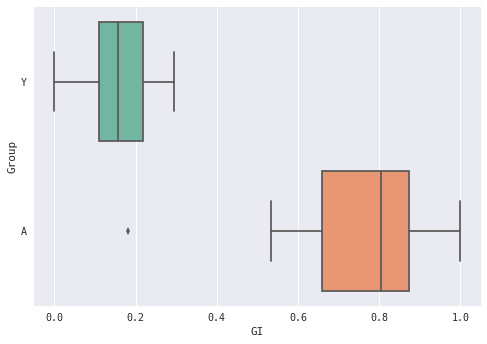

In [51]:
GI_ = GI.reset_index().rename(columns={0:'GI'})
sns.boxplot(data=GI_, x='GI', y='Group', palette=color_map);

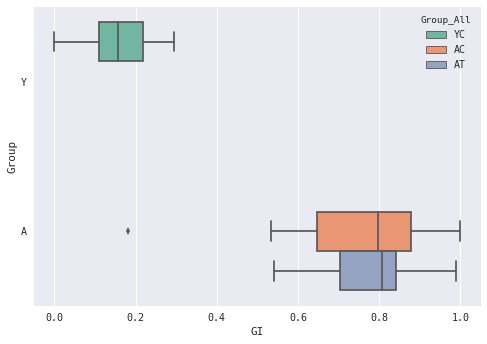

In [52]:
GI_ = GI.reset_index().rename(columns={0:'GI'})
sns.boxplot(data=GI_, x='GI', y='Group', hue='Group_All', palette = color_mapYAT);

# gait index - again,only p-values are derived from comparison of YC to AC

In [53]:
# MODIFICATION: Compare only groups Young Control and Aged Control
selectedYAT, _ = sel_anova(d.ix[md['Group_All']!='AT'],
                md.ix[md['Group_All']!='AT']['Group_All'], mode = 'classif')

print("Features selected by f_regression")
significantYAT = selectedYAT.ix[selectedYAT.pval < 0.05]
significantYAT

Features selected by f_regression


param          pval
0                  mouse length (cm)  1.954270e-08
100         FP_PrintLength_(cm)_Mean  6.228406e-07
54          LF_PrintLength_(cm)_Mean  8.378691e-07
8           RF_PrintLength_(cm)_Mean  1.079074e-06
64         LF_StrideLength_(cm)_Mean  2.586839e-06
110        FP_StrideLength_(cm)_Mean  3.167068e-06
136         HP_SingleStance_(s)_Mean  5.935064e-06
18         RF_StrideLength_(cm)_Mean  6.707434e-06
90          LH_SingleStance_(s)_Mean  7.976687e-06
77          LH_PrintLength_(cm)_Mean  8.713701e-06
123         HP_PrintLength_(cm)_Mean  1.234425e-05
31          RH_PrintLength_(cm)_Mean  3.311268e-05
133        HP_StrideLength_(cm)_Mean  3.547066e-05
87         LH_StrideLength_(cm)_Mean  4.105829e-05
131                HP_Swing_(s)_Mean  4.614714e-05
41         RH_StrideLength_(cm)_Mean  6.171538e-05
44          RH_SingleStance_(s)_Mean  1.061010e-04
5       RF_MaxContactArea_(cm²)_Mean  1.840521e-04
113         FP_SingleStance_(s)_Mean  2.126923e-04
85                 LH_Swing_(s)_Mean  2.193550e-04
97      FP_MaxContactArea_(cm²)_Mean  3.146561e-04
10           RF_PrintArea_(cm²)_Mean  3.288342e-04
102          FP_PrintArea_(cm²)_Mean  4.914862e-04
39                 RH_Swing_(s)_Mean  5.425154e-04
51      LF_MaxContactArea_(cm²)_Mean  7.448321e-04
21          RF_SingleStance_(s)_Mean  7.495027e-04
95                FP_StandIndex_Mean  8.197295e-04
56           LF_PrintArea_(cm²)_Mean  9.445647e-04
125          HP_PrintArea_(cm²)_Mean  9.551861e-04
33           RH_PrintArea_(cm²)_Mean  1.054838e-03
120     HP_MaxContactArea_(cm²)_Mean  1.083304e-03
28      RH_MaxContactArea_(cm²)_Mean  1.120440e-03
79           LH_PrintArea_(cm²)_Mean  1.296371e-03
74      LH_MaxContactArea_(cm²)_Mean  1.411702e-03
57        LF_MaxIntensityAt_(%)_Mean  1.424559e-03
67          LF_SingleStance_(s)_Mean  1.440016e-03
72                LH_StandIndex_Mean  1.463916e-03
103       FP_MaxIntensityAt_(%)_Mean  1.681606e-03
3                 RF_StandIndex_Mean  2.727798e-03
118               HP_StandIndex_Mean  2.759767e-03
49                LF_StandIndex_Mean  2.949106e-03
2                  RF_Stand_(s)_Mean  4.663150e-03
94                 FP_Stand_(s)_Mean  7.123286e-03
7    RF_MaxContactMeanIntensity_Mean  1.337877e-02
99   FP_MaxContactMeanIntensity_Mean  1.377072e-02
19             RF_StepCycle_(s)_Mean  1.453730e-02
147                        RH_ST_COV  1.551884e-02
14             RF_MeanIntensity_Mean  1.563189e-02
142                        RF_SL_COV  1.647181e-02
53   LF_MaxContactMeanIntensity_Mean  1.737581e-02
88             LH_StepCycle_(s)_Mean  1.744263e-02
111            FP_StepCycle_(s)_Mean  1.749097e-02
106            FP_MeanIntensity_Mean  1.771375e-02
134            HP_StepCycle_(s)_Mean  1.896038e-02
26                RH_StandIndex_Mean  1.896596e-02
11        RF_MaxIntensityAt_(%)_Mean  2.213487e-02
65             LF_StepCycle_(s)_Mean  2.390667e-02
60             LF_MeanIntensity_Mean  2.421931e-02
48                 LF_Stand_(s)_Mean  2.523979e-02
42             RH_StepCycle_(s)_Mean  3.228895e-02
157                        LH_ST_MAD  4.995282e-02

### 2. Can I combine them to some reasonable index? (gait / age index)

I am going to define RI as the weighted average of all parameters, where weights: 1/p-value:
RI = parameter * (1/pval), [0,1]

In [54]:
GI = GI_calculate(d, GI_get_weights(d, md, groups="YC-AC"))
GI

Group  Group_All  Animal
Y      YC         1.1       0.298010
                  1.2       0.194616
                  1.3       0.124013
                  1.4       0.117386
                  3.2       0.190085
                  3.3       0.000000
                  3.4       0.106767
                  4.1       0.202216
                  4.2       0.067377
                  4.3       0.145218
                  4.4       0.143830
                  5.1       0.241953
                  5.2       0.274813
                  5.3       0.286119
                  5.4       0.154801
A      AC         1.1       0.790093
                  1.2       0.712262
                  1.3       0.195365
                  1.4       0.540438
                  2.1       0.813655
                  2.2       0.635886
                  2.3       0.909640
                  2.4       0.822605
                  3.1       0.913257
                  3.2       1.000000
       AT         1.1       0.642991
             

In [55]:
# cross-validate on the dataset: how well can a subset of data
# recreate RI for a hidden portion of data?
# The mean diffrence is
pd.concat(GI_CV(d, md, n_trials = 100, test_size=0.25)).mean()

0.06795315379251826

'cross-validate' on the dataset: how well can a subset of data
recreate RI for a hidden portion of data?
The mean diffrence is
about 7%

Let's plot the Index

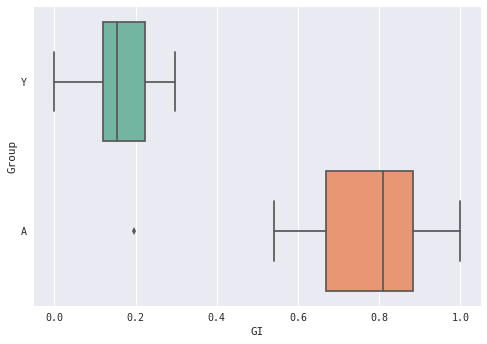

In [56]:
GI_ = GI.reset_index().rename(columns={0:'GI'})
sns.boxplot(data=GI_, x='GI', y='Group', palette = color_map);

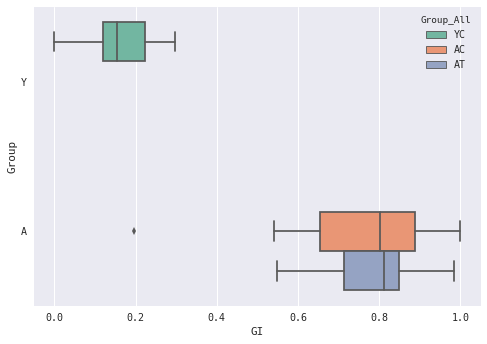

In [57]:
GI_ = GI.reset_index().rename(columns={0:'GI'})
sns.boxplot(data=GI_, x='GI', y='Group', hue='Group_All', palette = color_mapYAT);

The p-values of anova-based selection of parameters are very similar for comparison between:

a) YC and AC+AT

b) YC and AC

# Comparison of right and left side parameters

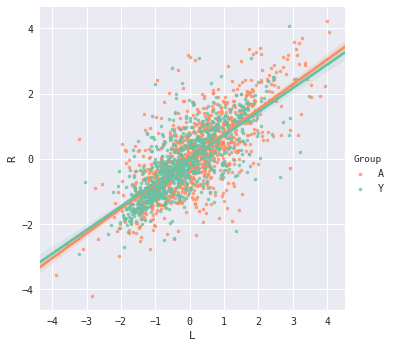

In [66]:
d_plot = plot_L_R(d, use_level=0)
sns.lmplot(x='L', y='R', data=d_plot, hue='Group',  markers=".", palette=color_map);

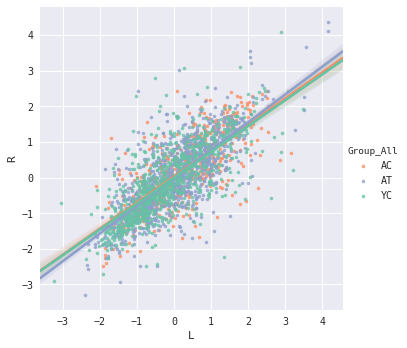

In [67]:
d_plot = plot_L_R(d, use_level=1)
sns.lmplot(x='L', y='R', data=d_plot, hue='Group_All',  markers=".", palette=color_mapYAT);

Each point on the plot represents a sided parameter.

In [61]:
d_plot.groupby('Group').mean()

L         R
Group                    
A      0.143339  0.108834
Y     -0.191119 -0.145112

The table shows the mean value of the left and right side parameters in young and aged mice. Collapsing mice to correlation isn't a good choice because one mouse may have damaged left brain side and another right, which would cancel out.
This may be assessed with errors / stdev.

In [62]:
d_plot.groupby('Group').std()

L         R
Group                    
A      1.138195  1.173607
Y      1.029833  1.011619

The table shows standard deviation of the left and right side parameters in young and aged mice. There may be some difference? But small.

# Correlations between right and left side parameters

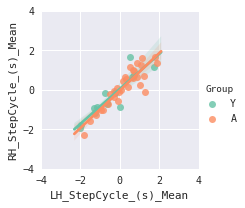

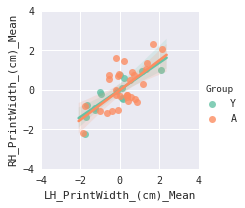

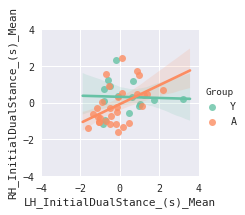

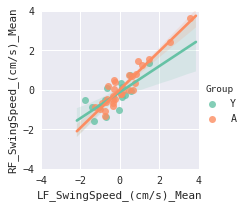

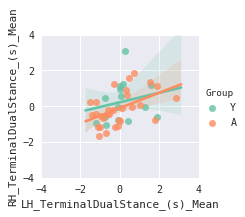

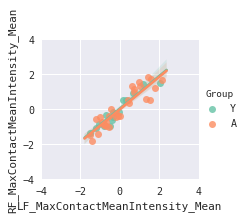

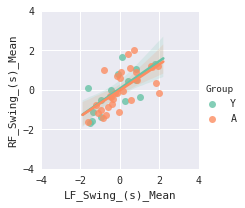

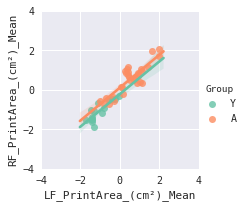

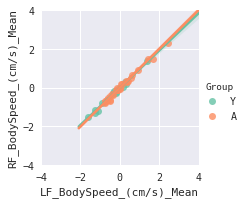

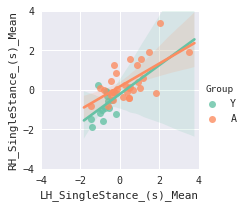

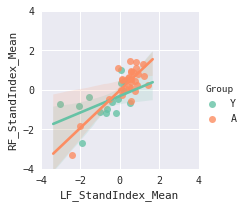

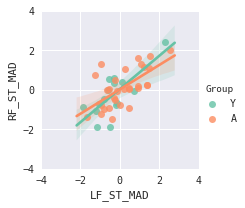

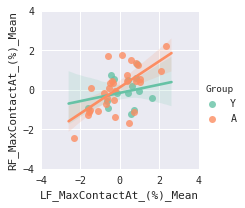

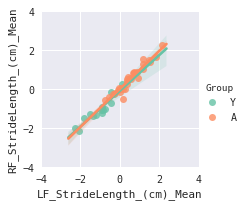

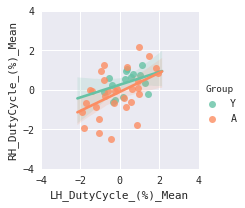

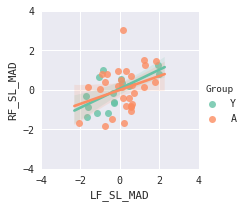

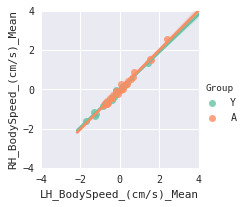

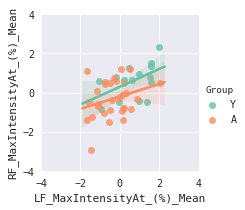

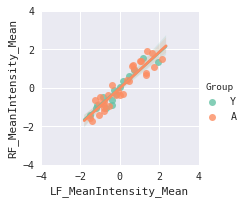

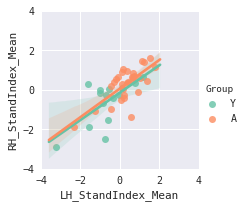

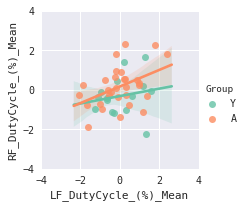

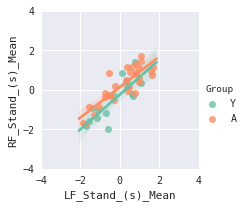

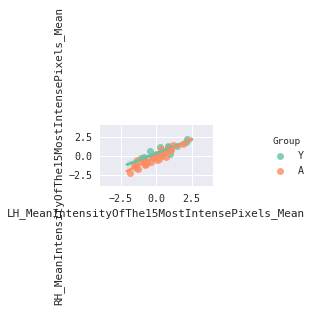

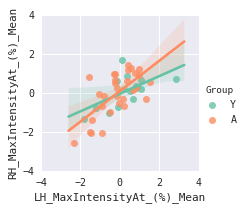

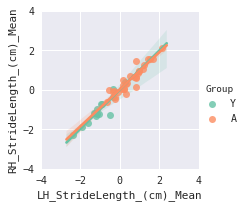

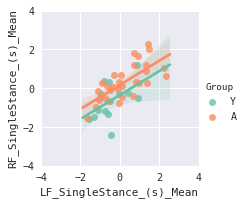

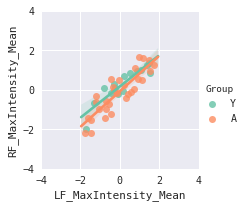

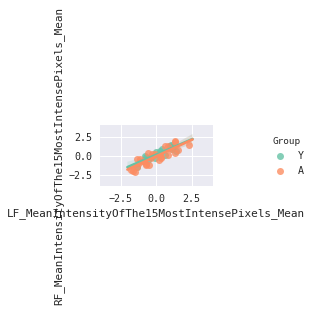

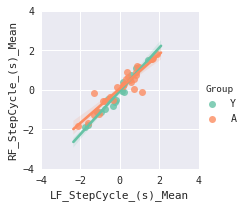

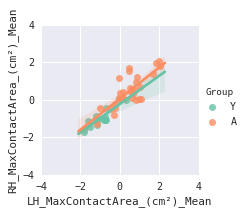

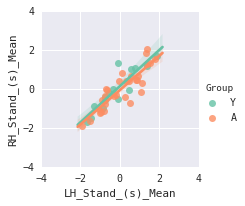

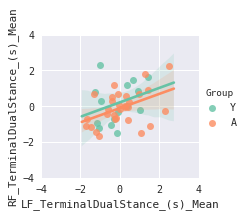

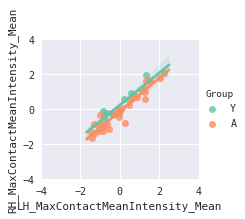

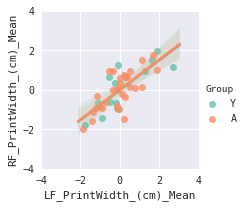

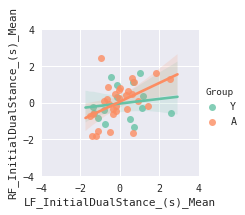

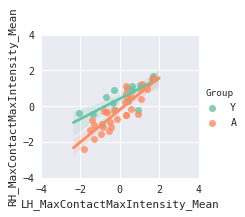

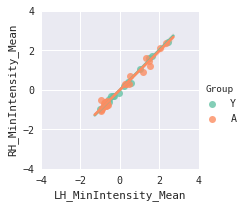

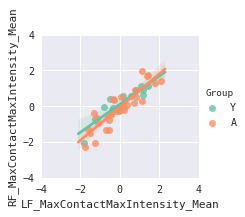

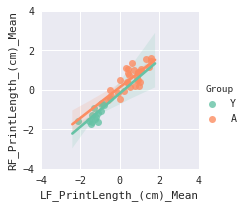

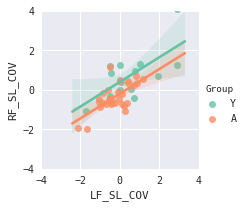

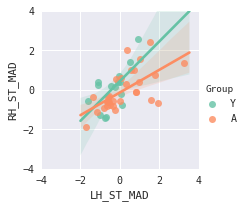

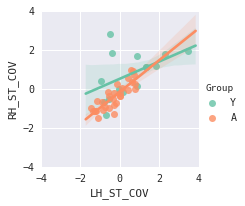

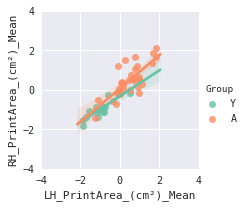

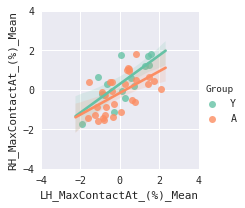

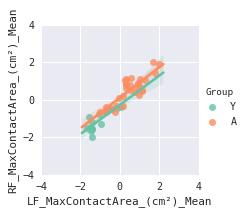

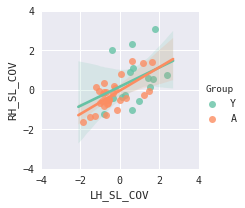

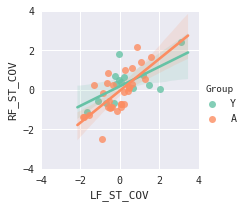

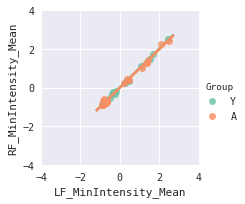

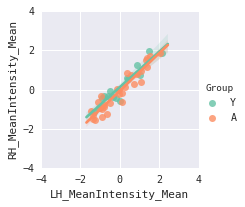

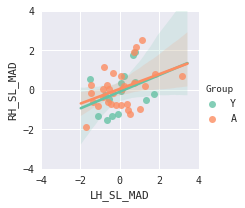

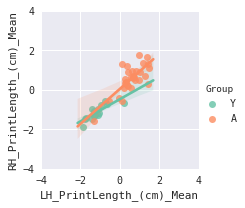

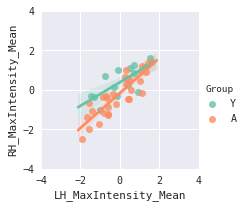

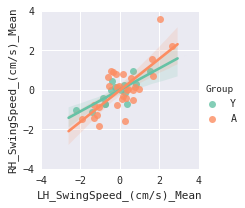

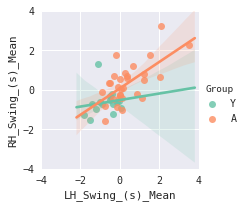

In [10]:
plot_relationships(d, n=10, palette=color_map, cut = [-4,4])

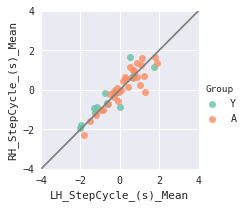

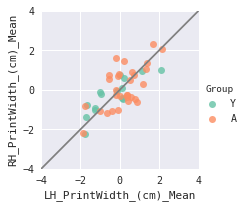

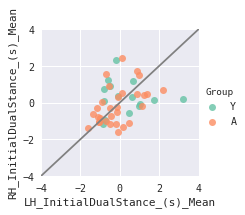

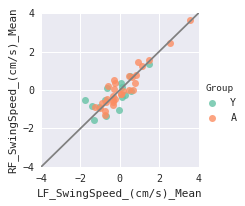

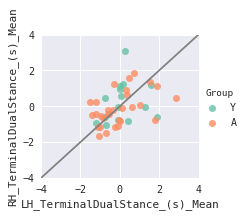

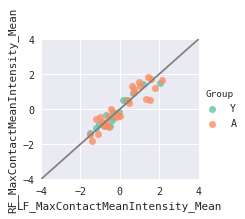

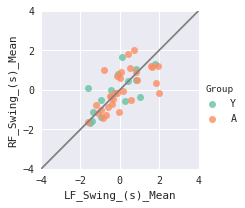

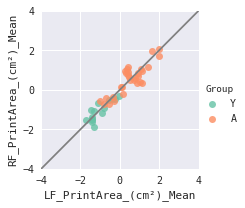

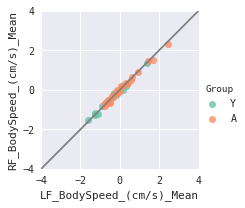

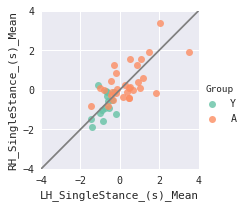

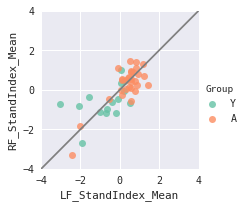

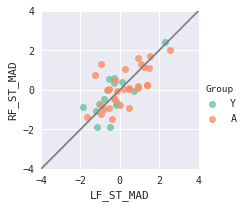

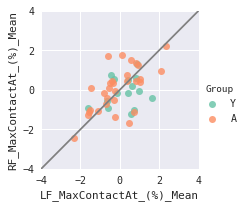

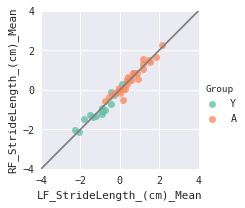

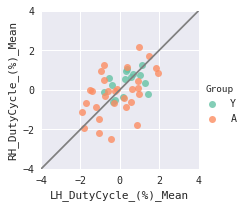

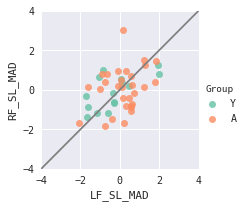

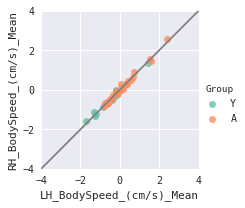

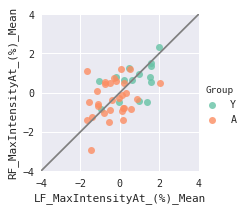

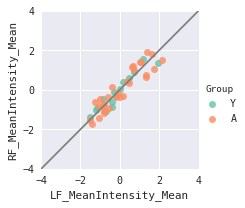

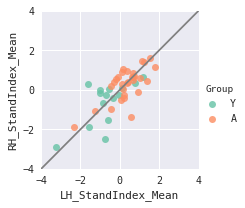

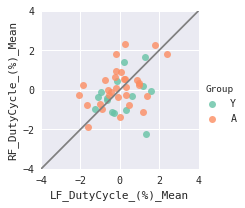

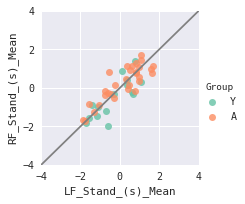

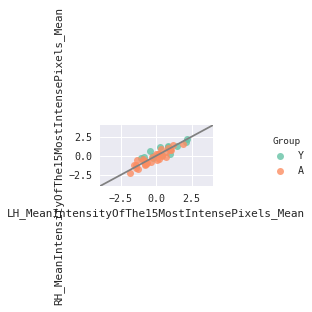

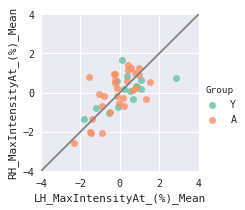

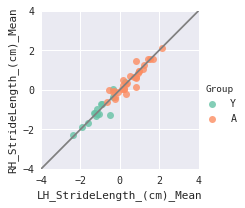

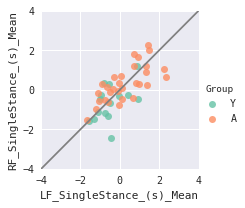

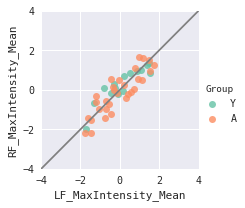

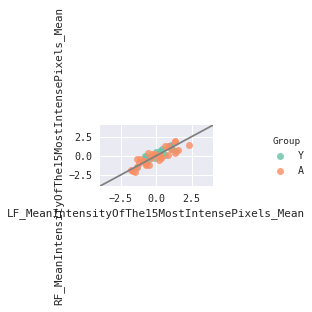

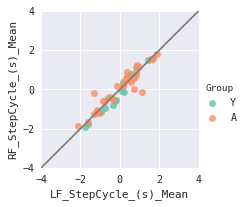

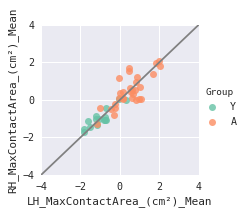

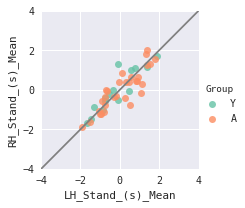

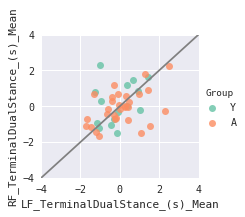

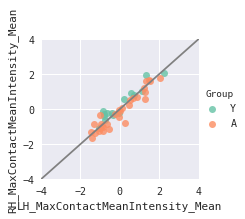

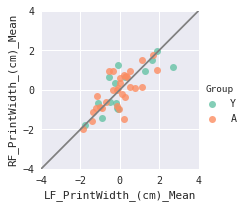

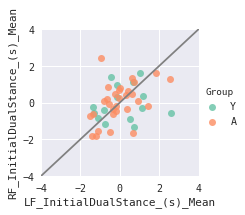

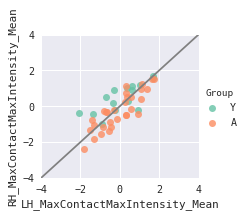

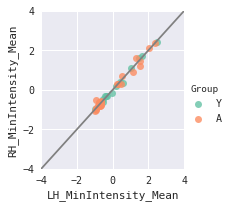

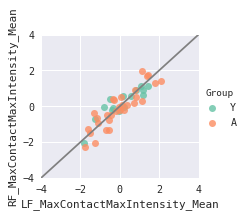

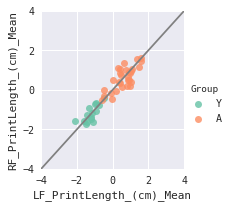

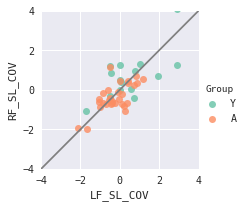

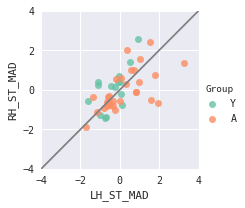

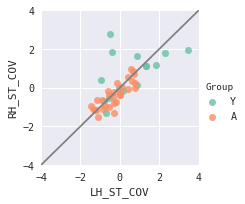

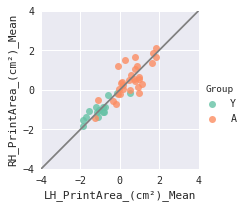

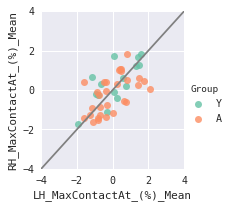

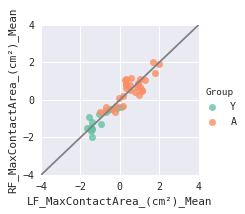

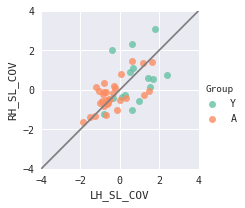

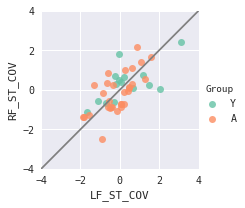

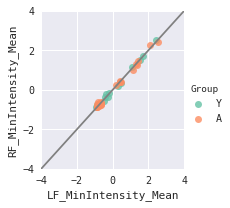

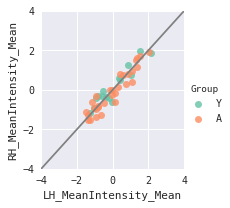

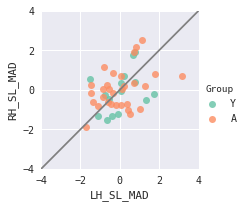

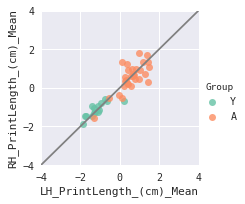

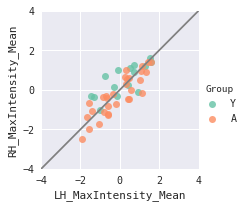

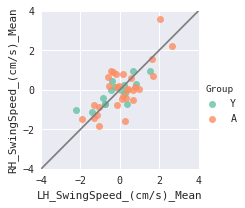

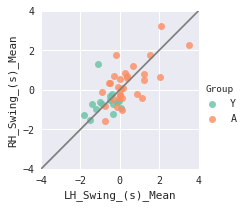

In [49]:
plot_relationships(d, n=None, palette=color_map, line='x=y', hue='Group', cut = [-4,4])

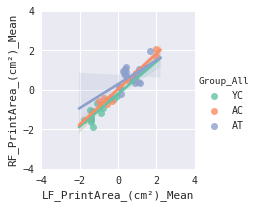

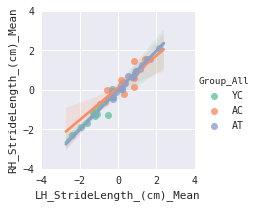

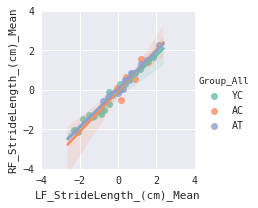

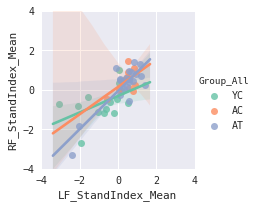

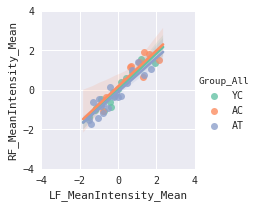

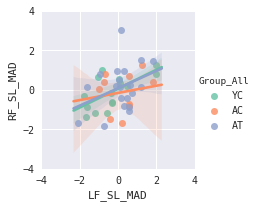

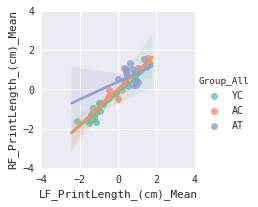

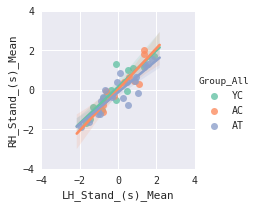

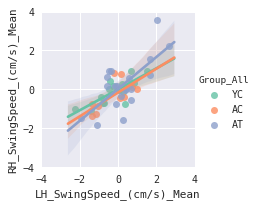

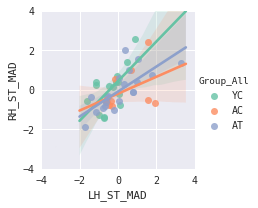

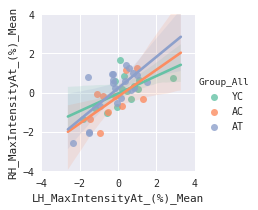

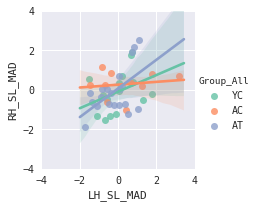

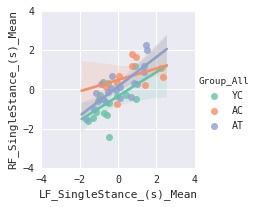

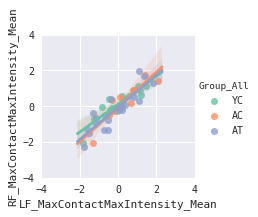

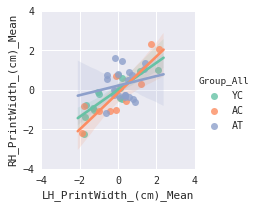

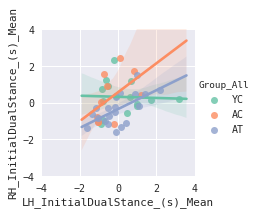

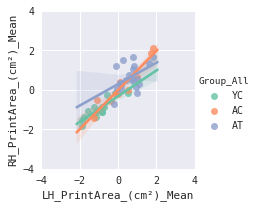

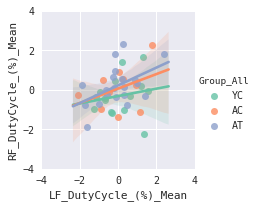

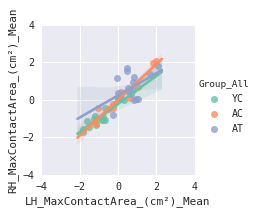

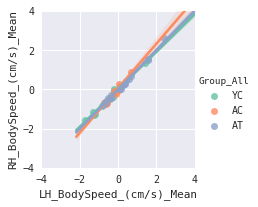

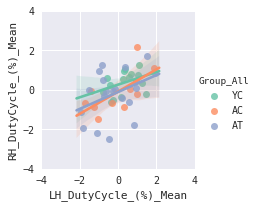

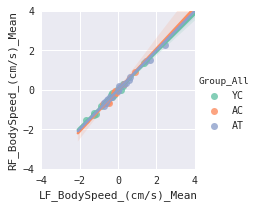

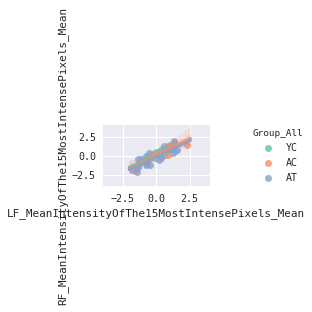

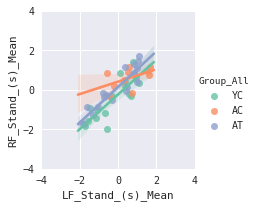

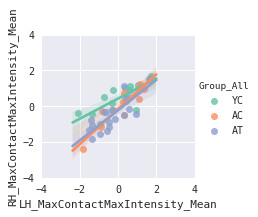

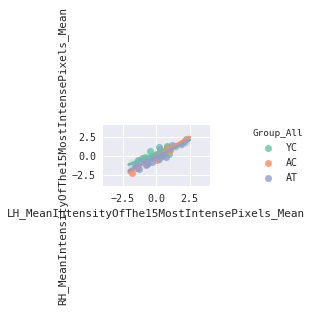

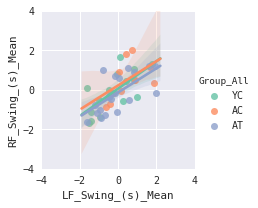

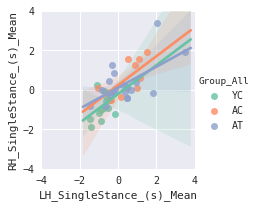

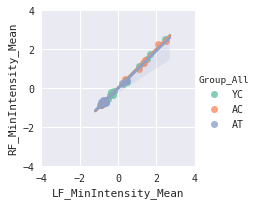

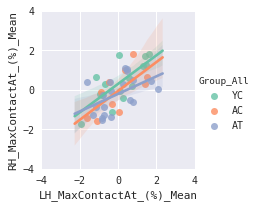

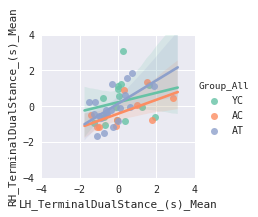

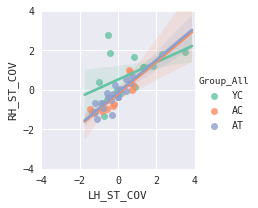

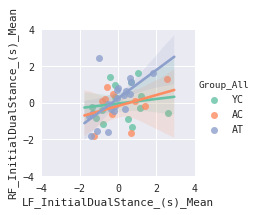

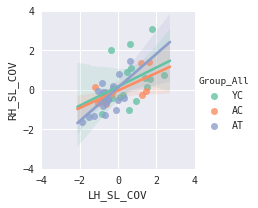

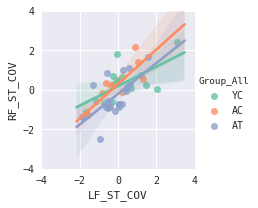

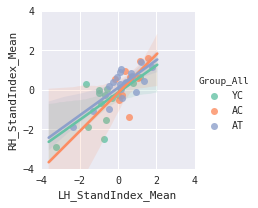

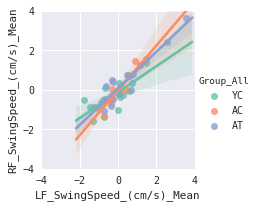

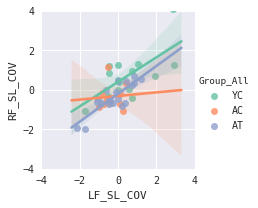

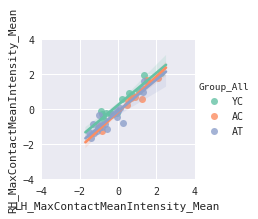

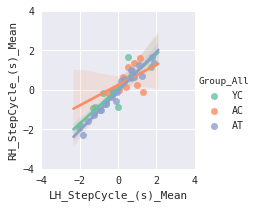

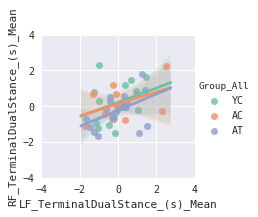

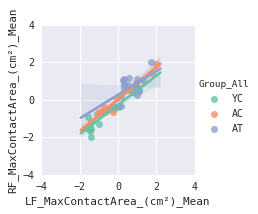

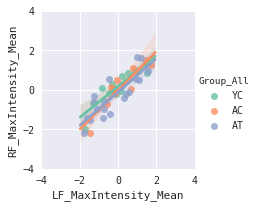

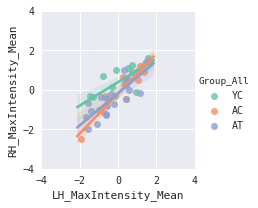

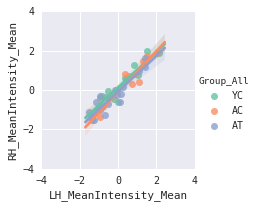

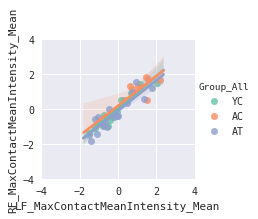

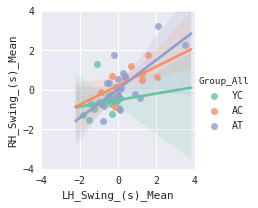

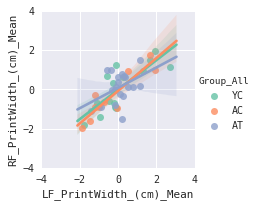

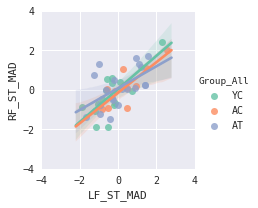

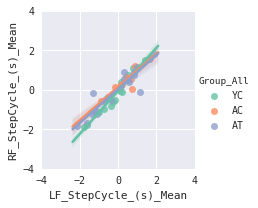

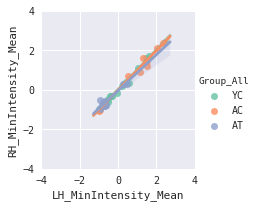

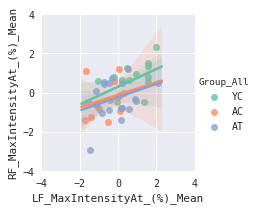

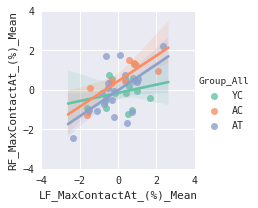

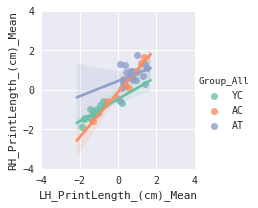

In [64]:
plot_relationships(d, palette=color_mapYAT, hue = "Group_All", cut = [-4,4])

In [48]:
plot_relationships(d, palette=color_map, line='x=y', hue='Group_All', cut = [-4,4])

KeyError: 'YC'

- comparison of which of those makes sense?
- some are pretty scattered.